In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
folder_path = '../data'
datasets = [name for name in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, name))]

In [3]:
def plot_feature_target_length(dataset):
    # Load feature and target data
    features_df = pd.read_csv(f'../data/{dataset}/features.csv')
    target_df = pd.read_csv(f'../data/{dataset}/targets.csv')
    
    # Calculate target length as the difference between max and min
    target_length = target_df['max.log.penalty'] - target_df['min.log.penalty']
    
    # Filter out non-numeric (NaN or infinite) target lengths
    valid_idx = np.isfinite(target_length)
    target_length = target_length[valid_idx]
    features_df = features_df[valid_idx]
    
    # Set maximum number of features per row
    max_features_per_row = 10
    num_features = features_df.shape[1]
    num_rows = (num_features + max_features_per_row - 1) // max_features_per_row  # Ceiling division

    # Create subplots with multiple rows and up to max_features_per_row columns
    fig, axes = plt.subplots(num_rows, min(num_features, max_features_per_row), figsize=(3 * min(num_features, max_features_per_row), 2 * num_rows), sharey=True)
    
    # Flatten axes in case of multiple rows for easier indexing
    axes = axes.flatten() if num_features > 1 else [axes]

    # Plot each feature column against the target length
    for i, column in enumerate(features_df.columns):
        axes[i].scatter(features_df[column], target_length)
        axes[i].set_title(f'{column} vs Target Length', fontsize=10)
        axes[i].set_xlabel(column, fontsize=8)
        if i % max_features_per_row == 0:  # Set y-axis label only for the first feature in each row
            axes[i].set_ylabel('Target Length', fontsize=8)
        axes[i].grid(True)

    # Hide unused subplots if there are any
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    # Set the name of the dataset as the figure title
    fig.suptitle(f'Feature vs Target Length for {dataset}', fontsize=14)

    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for the suptitle
    plt.show()

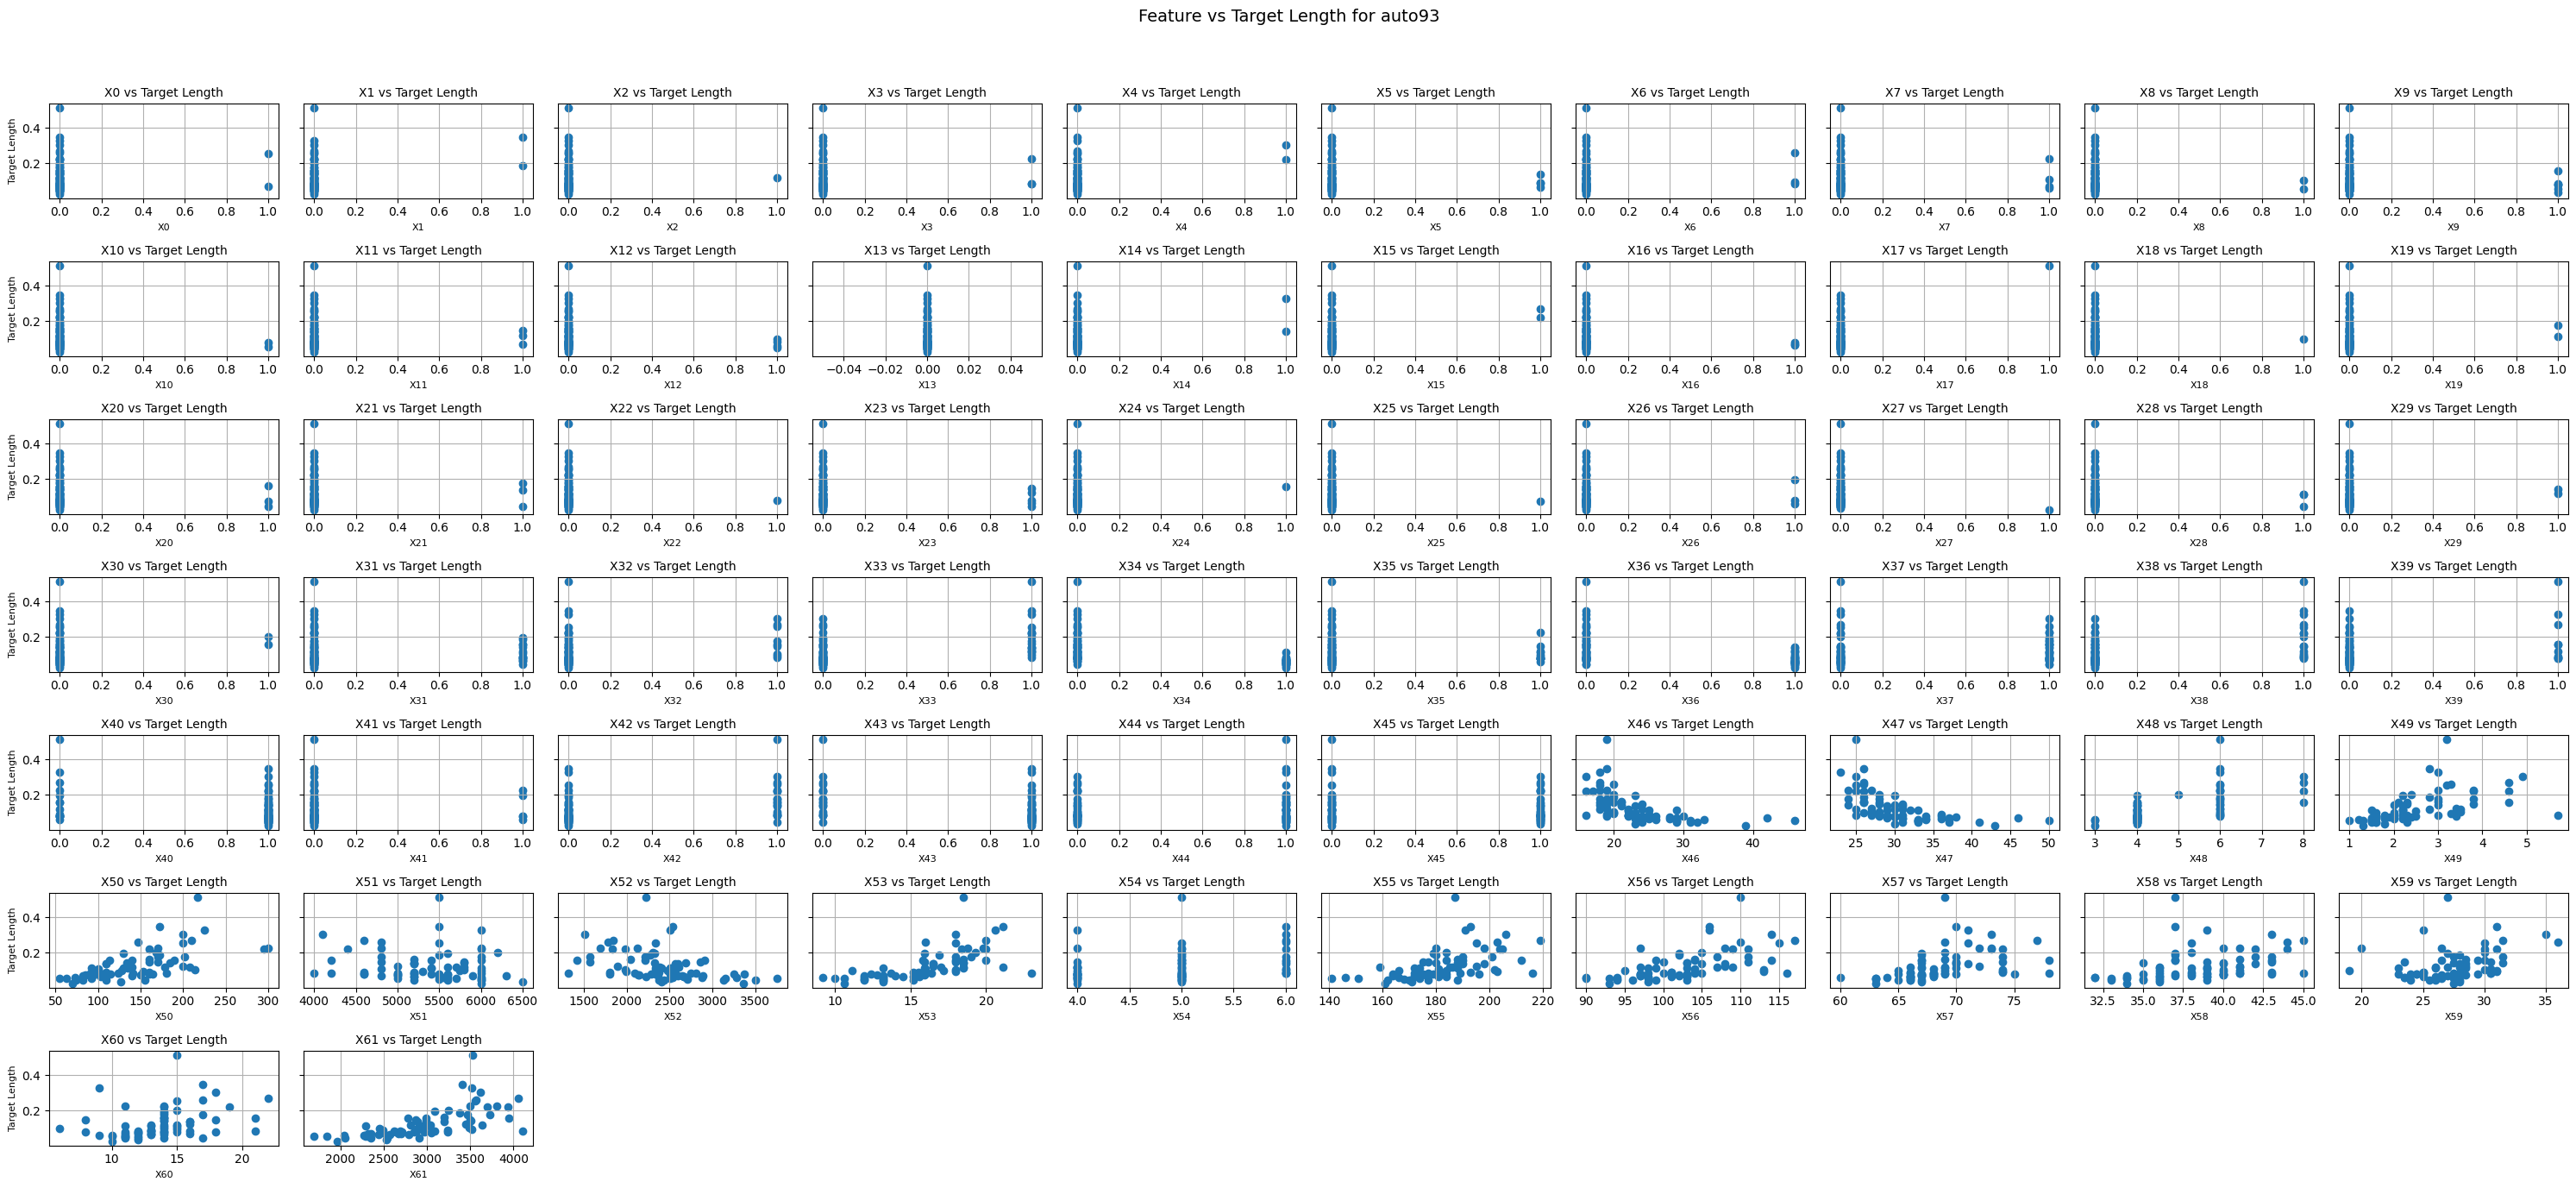

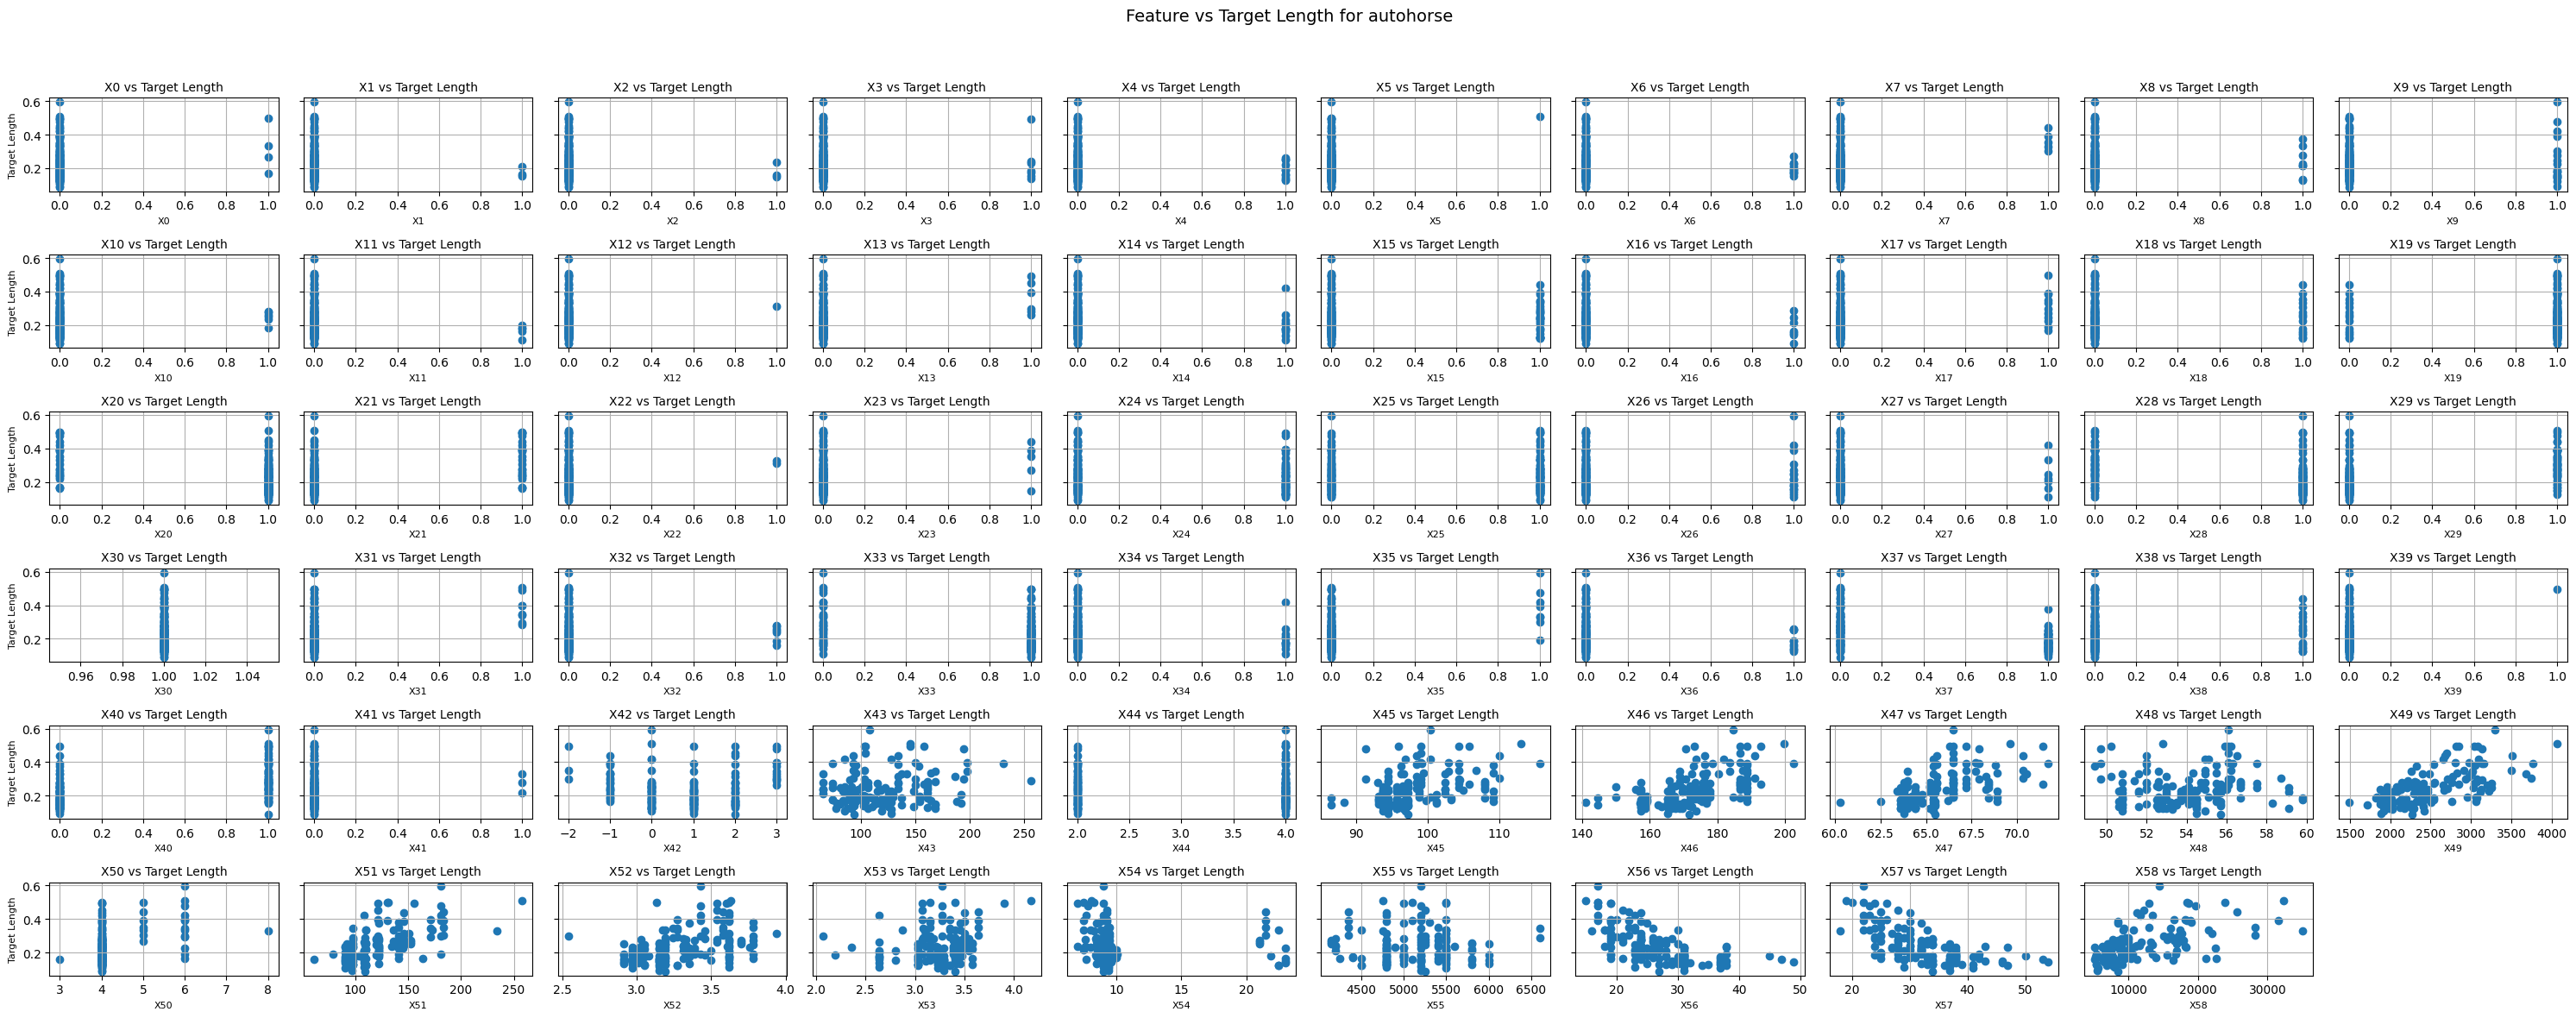

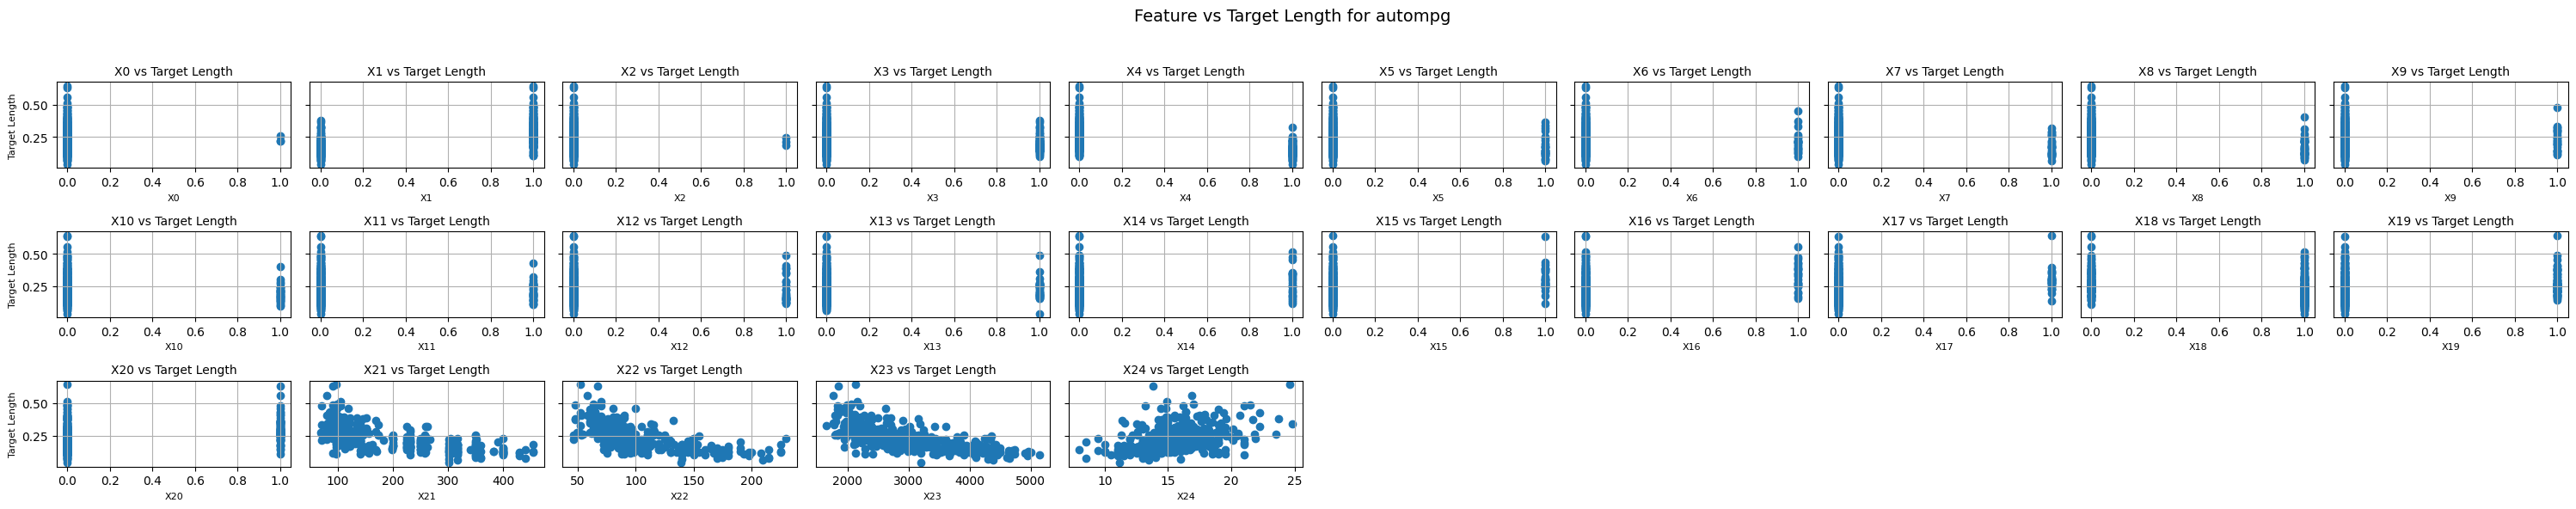

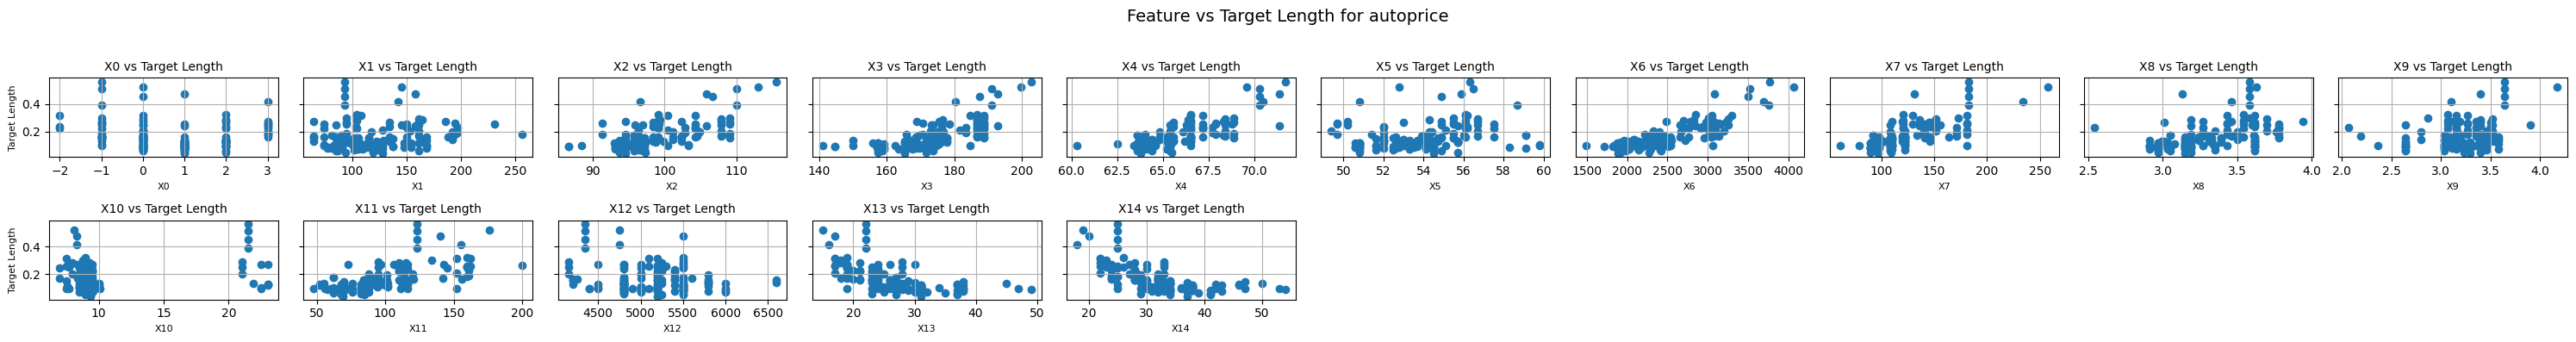

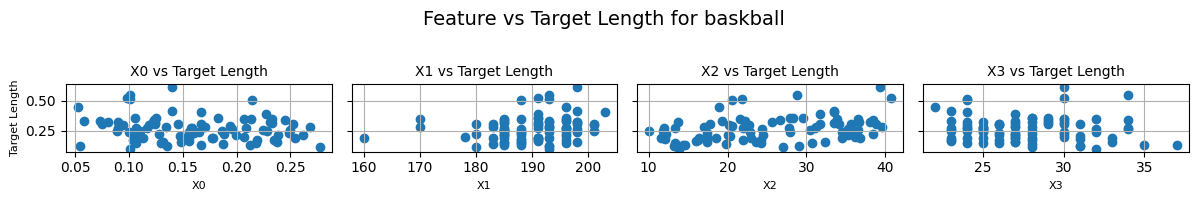

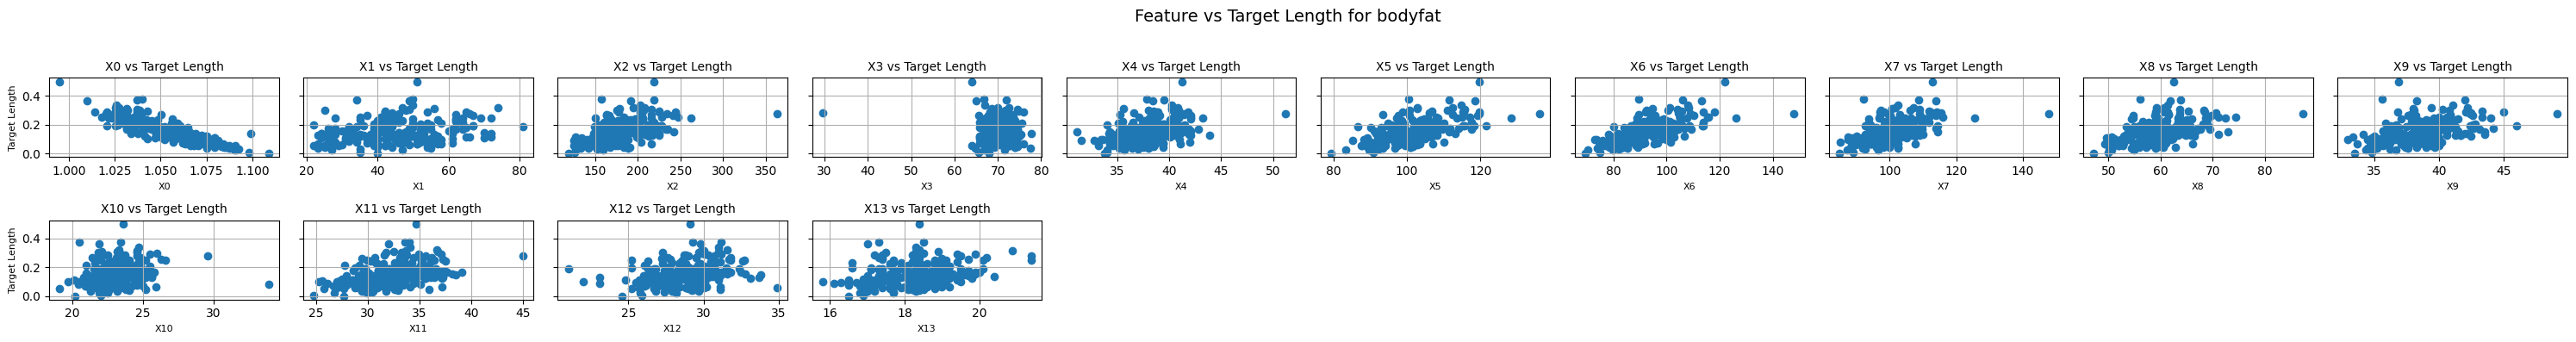

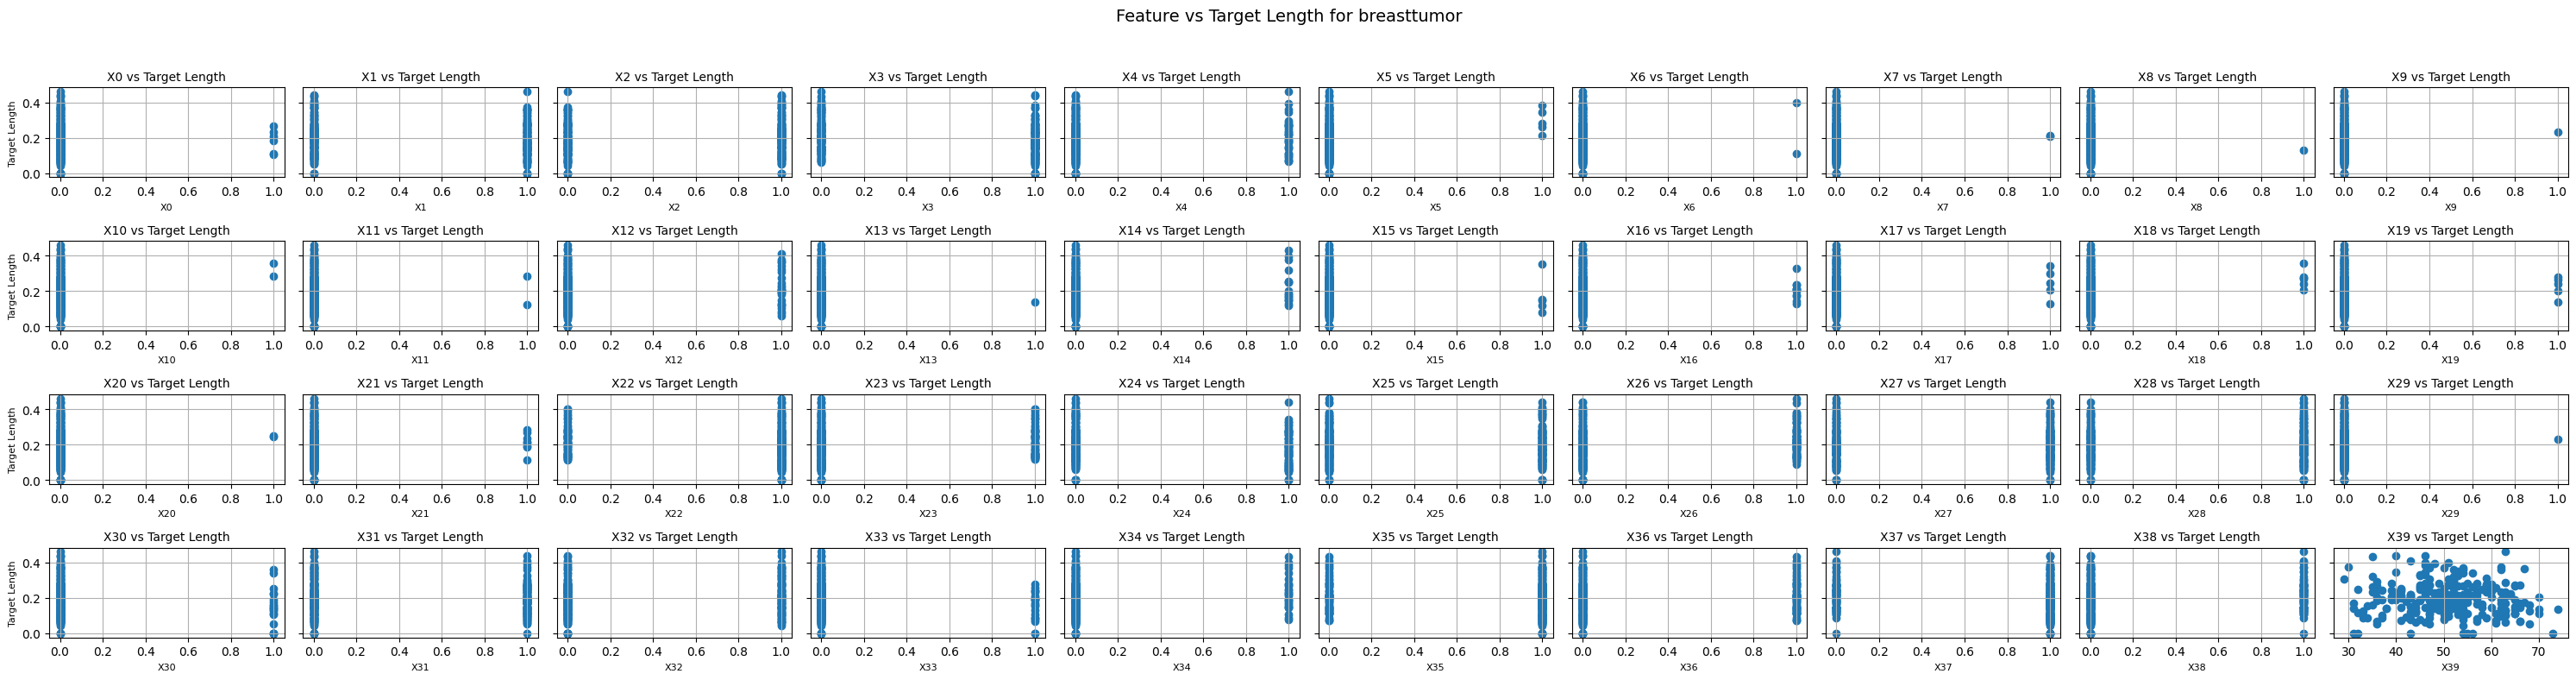

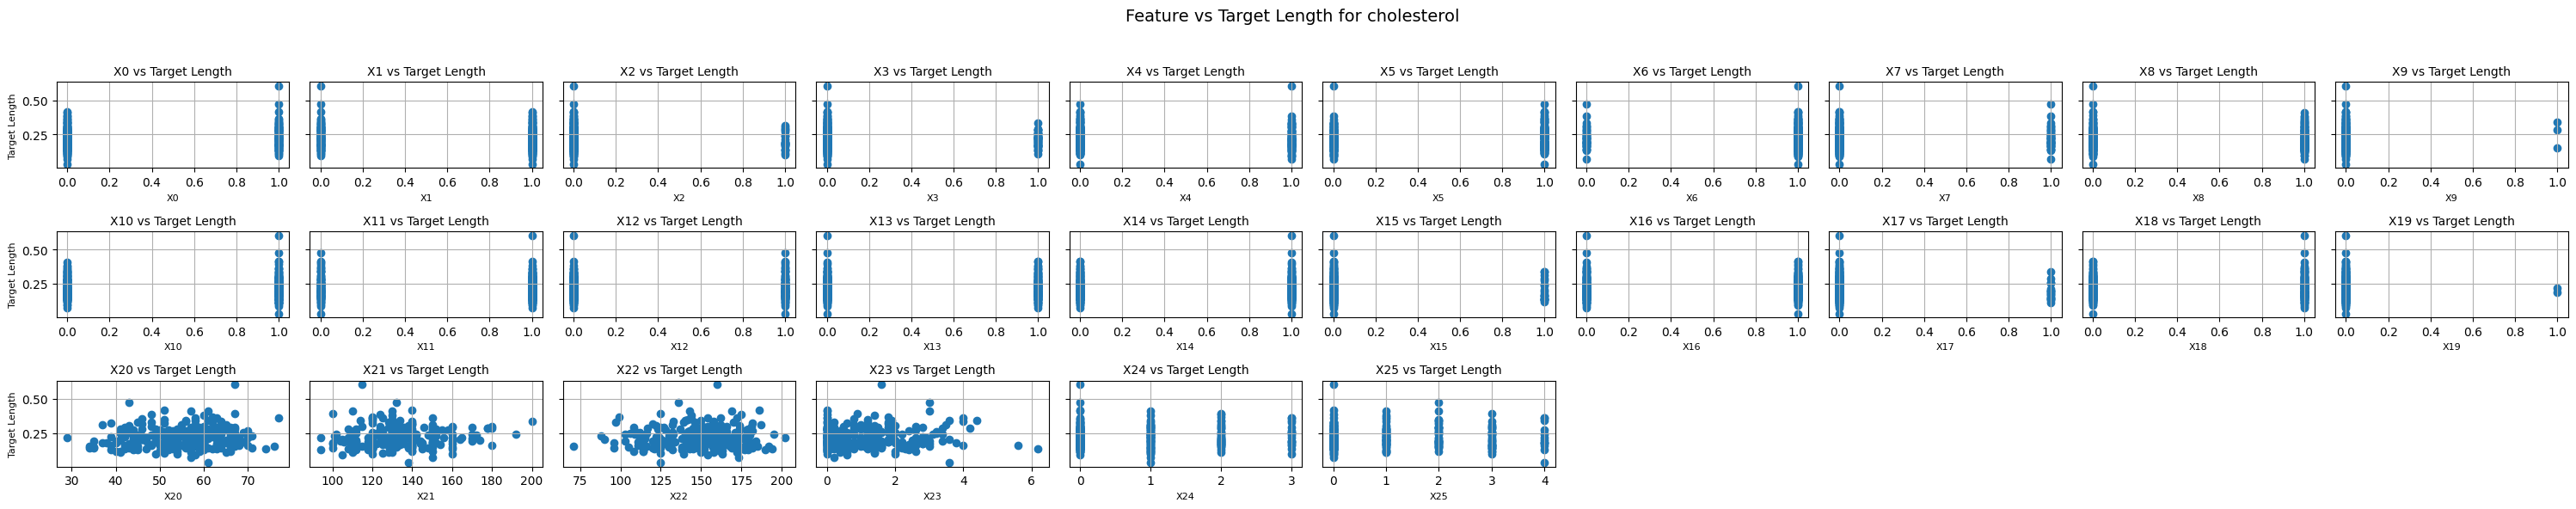

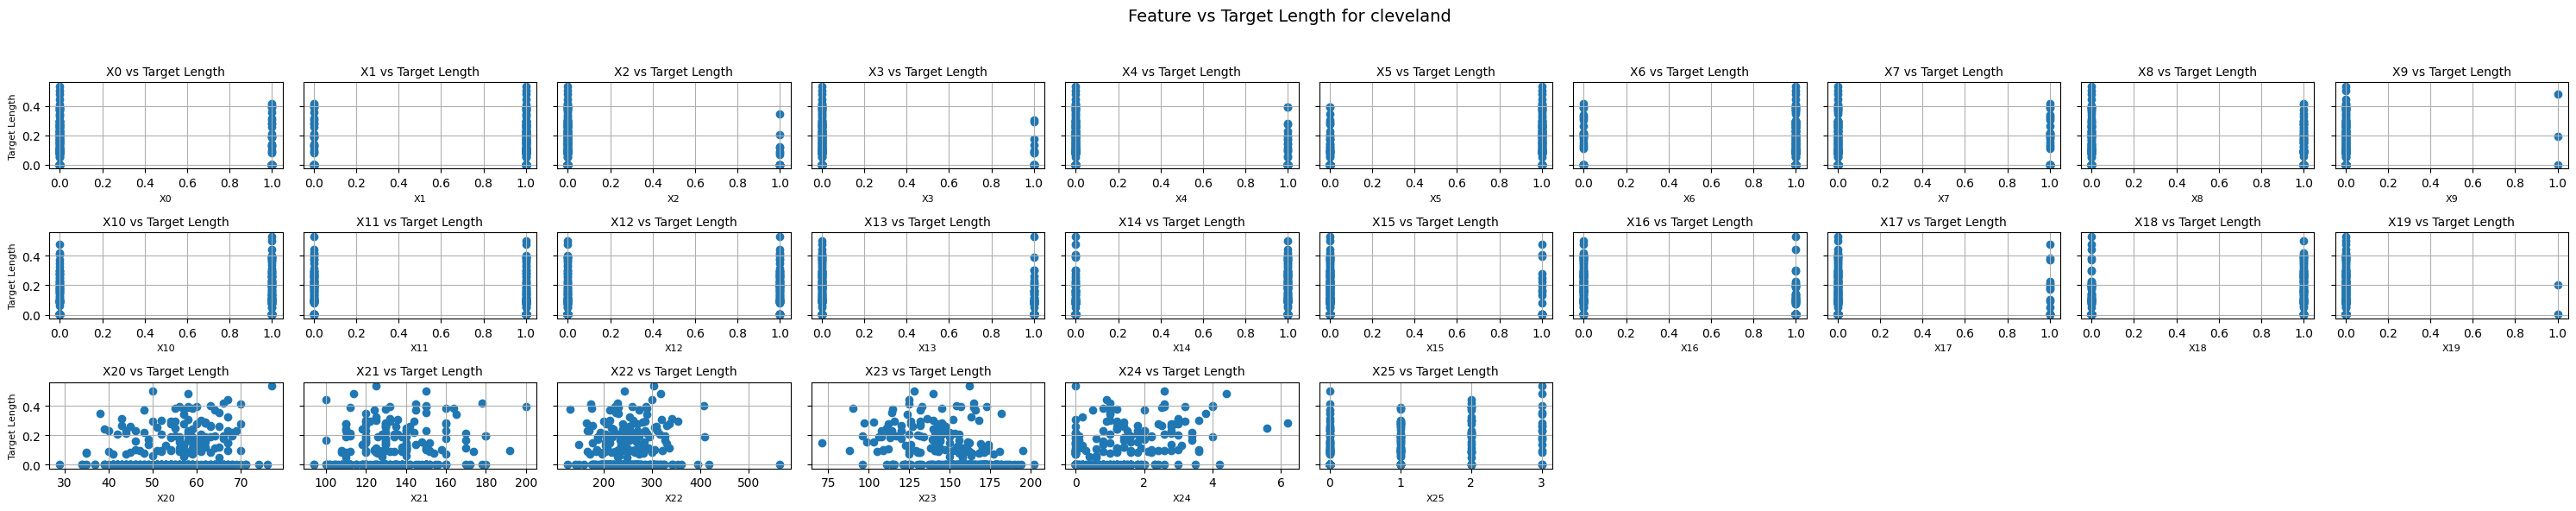

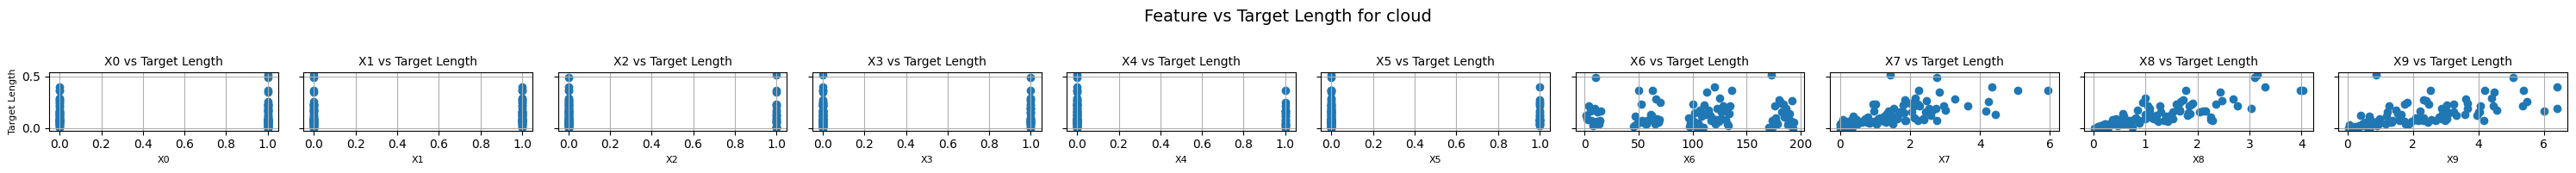

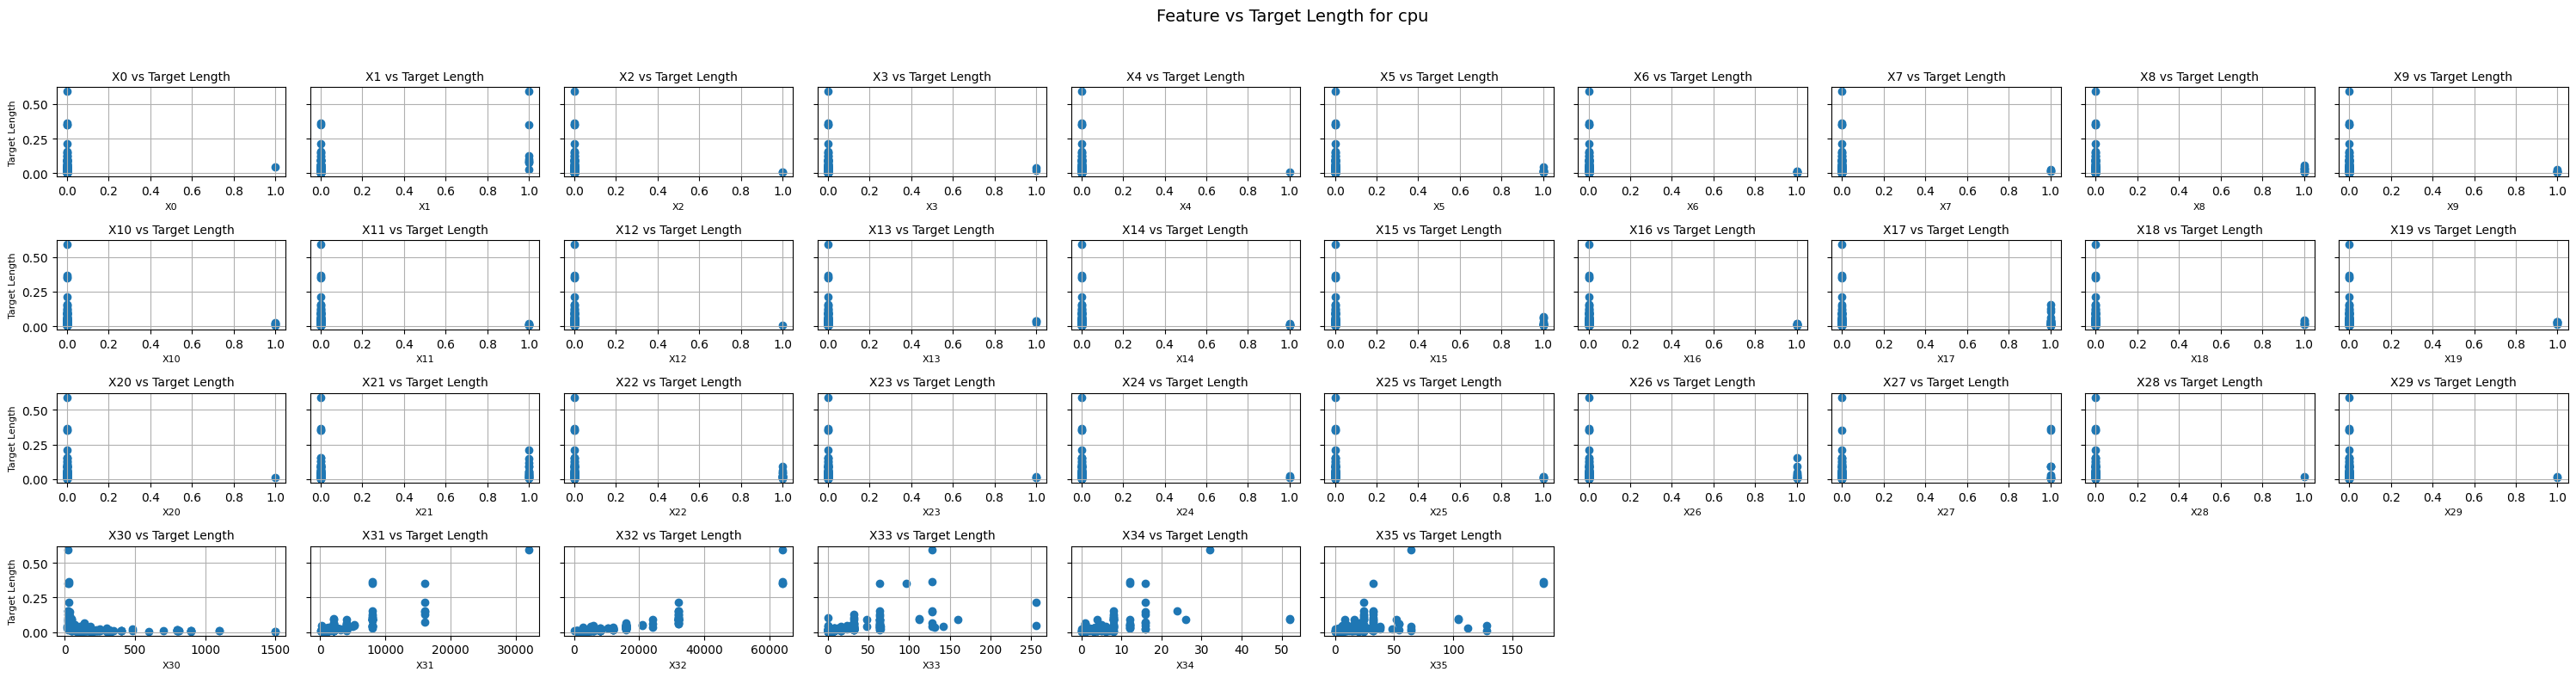

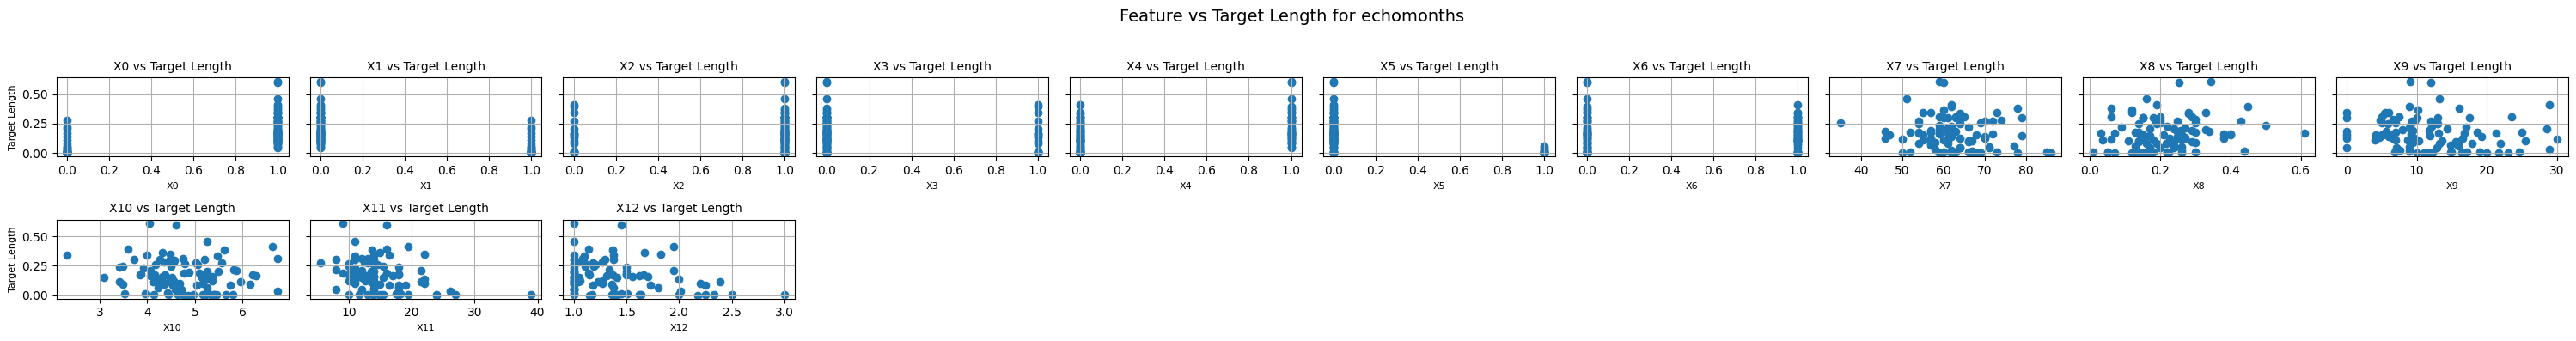

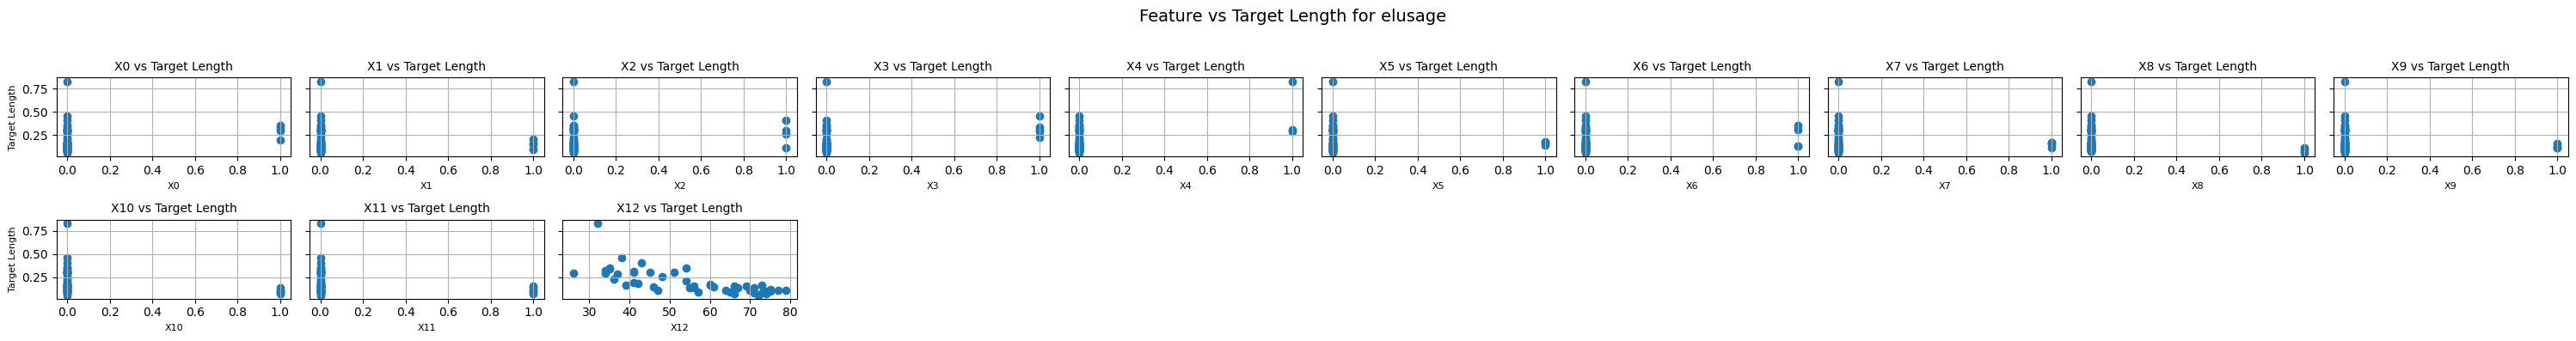

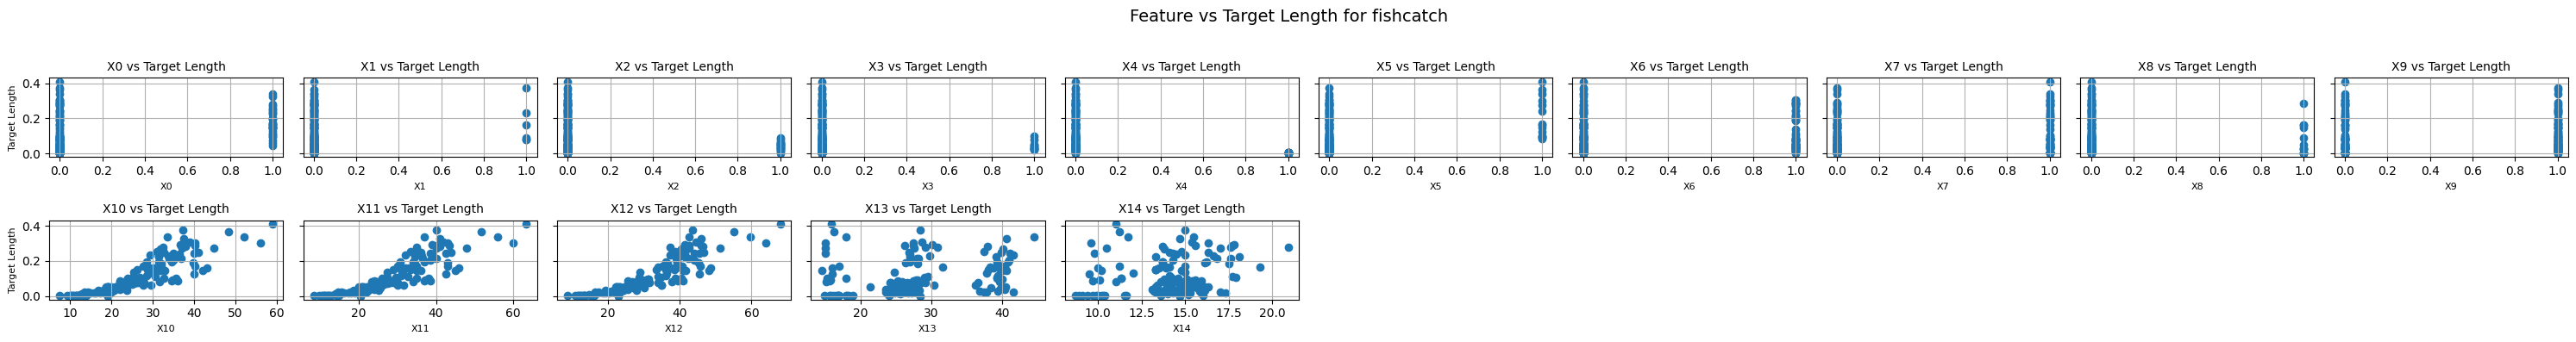

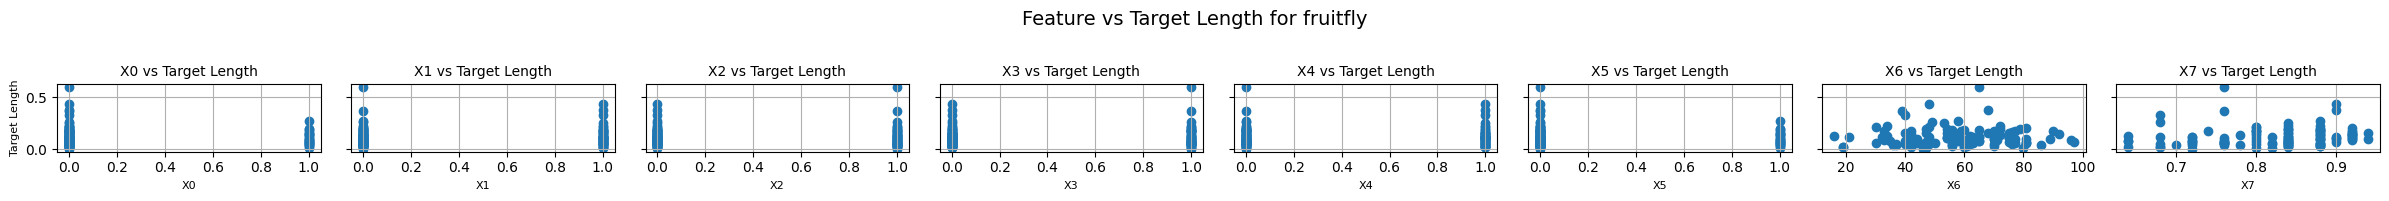

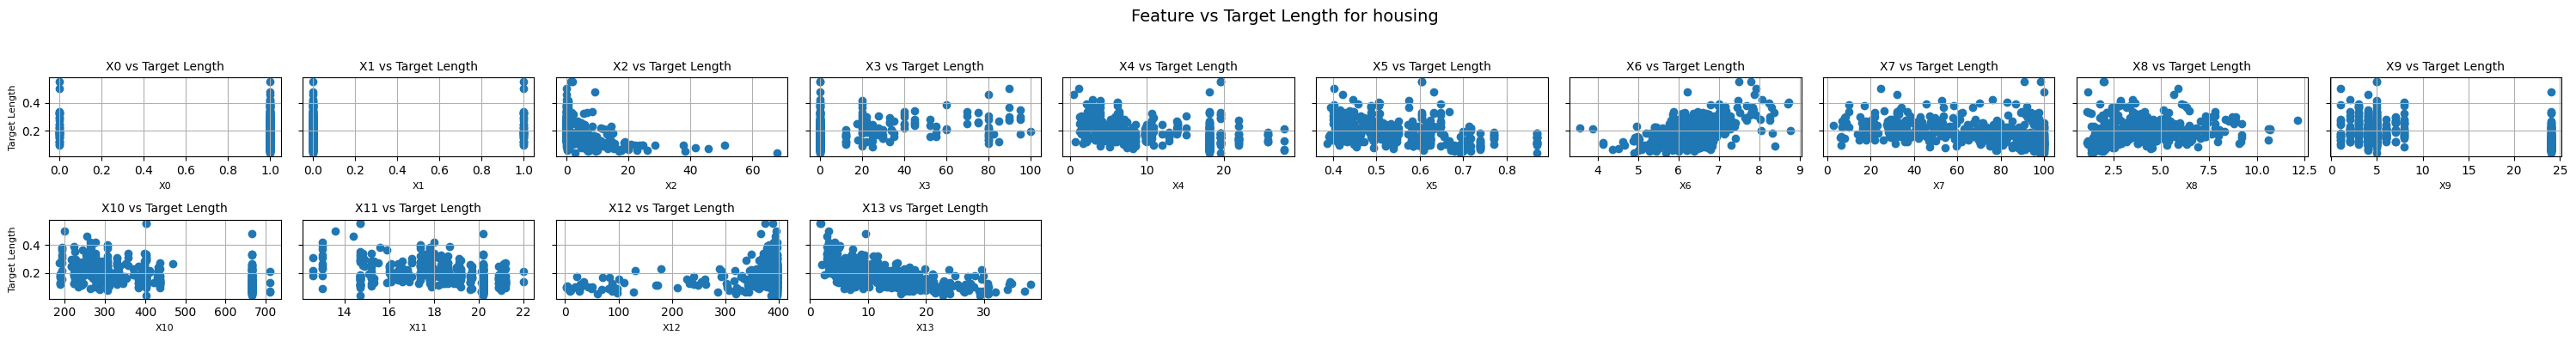

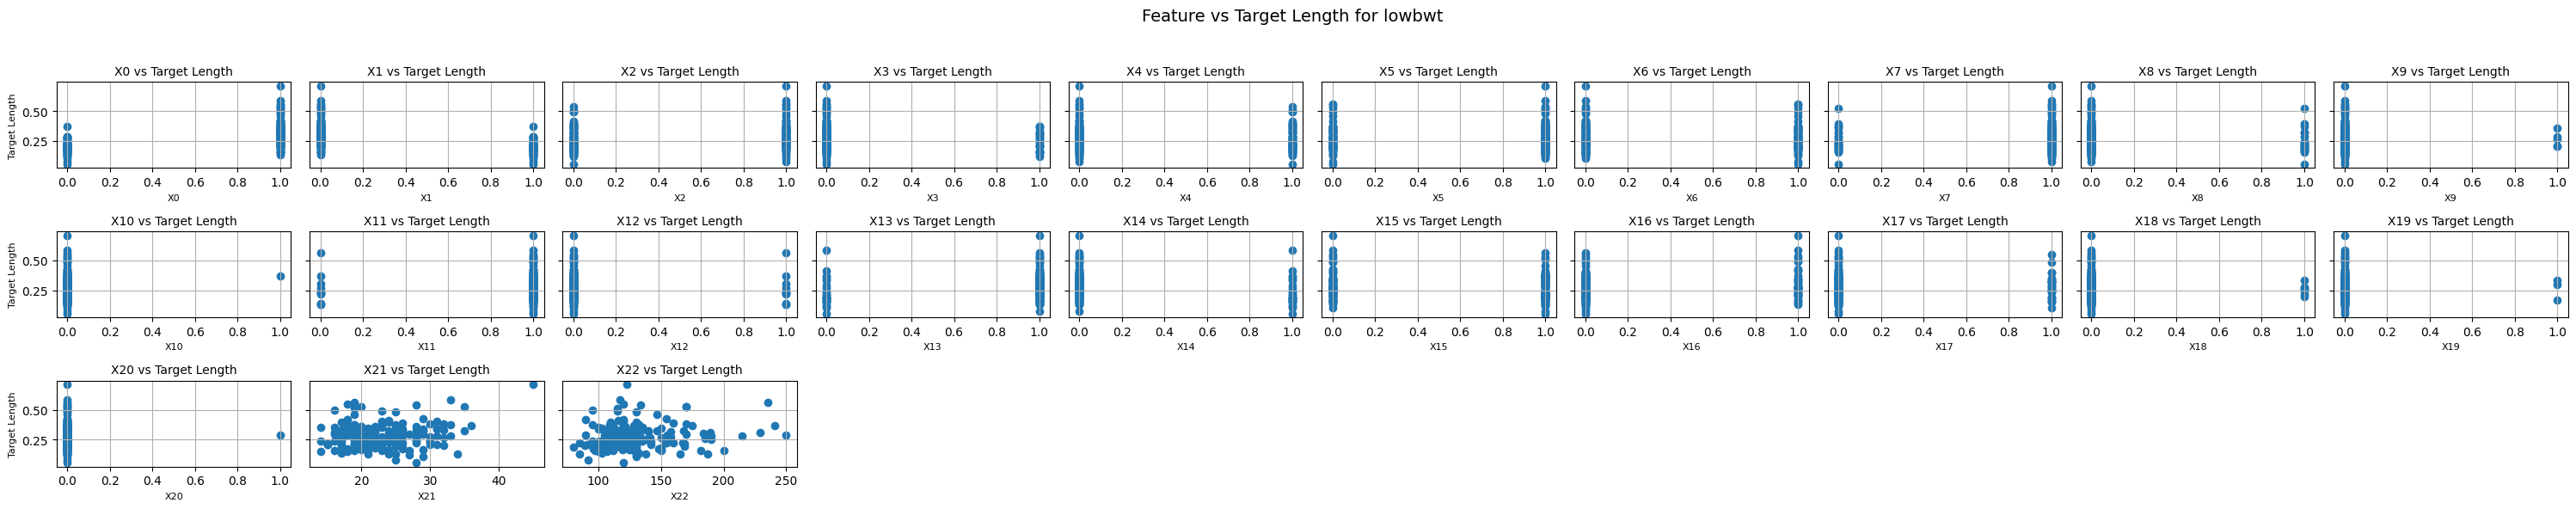

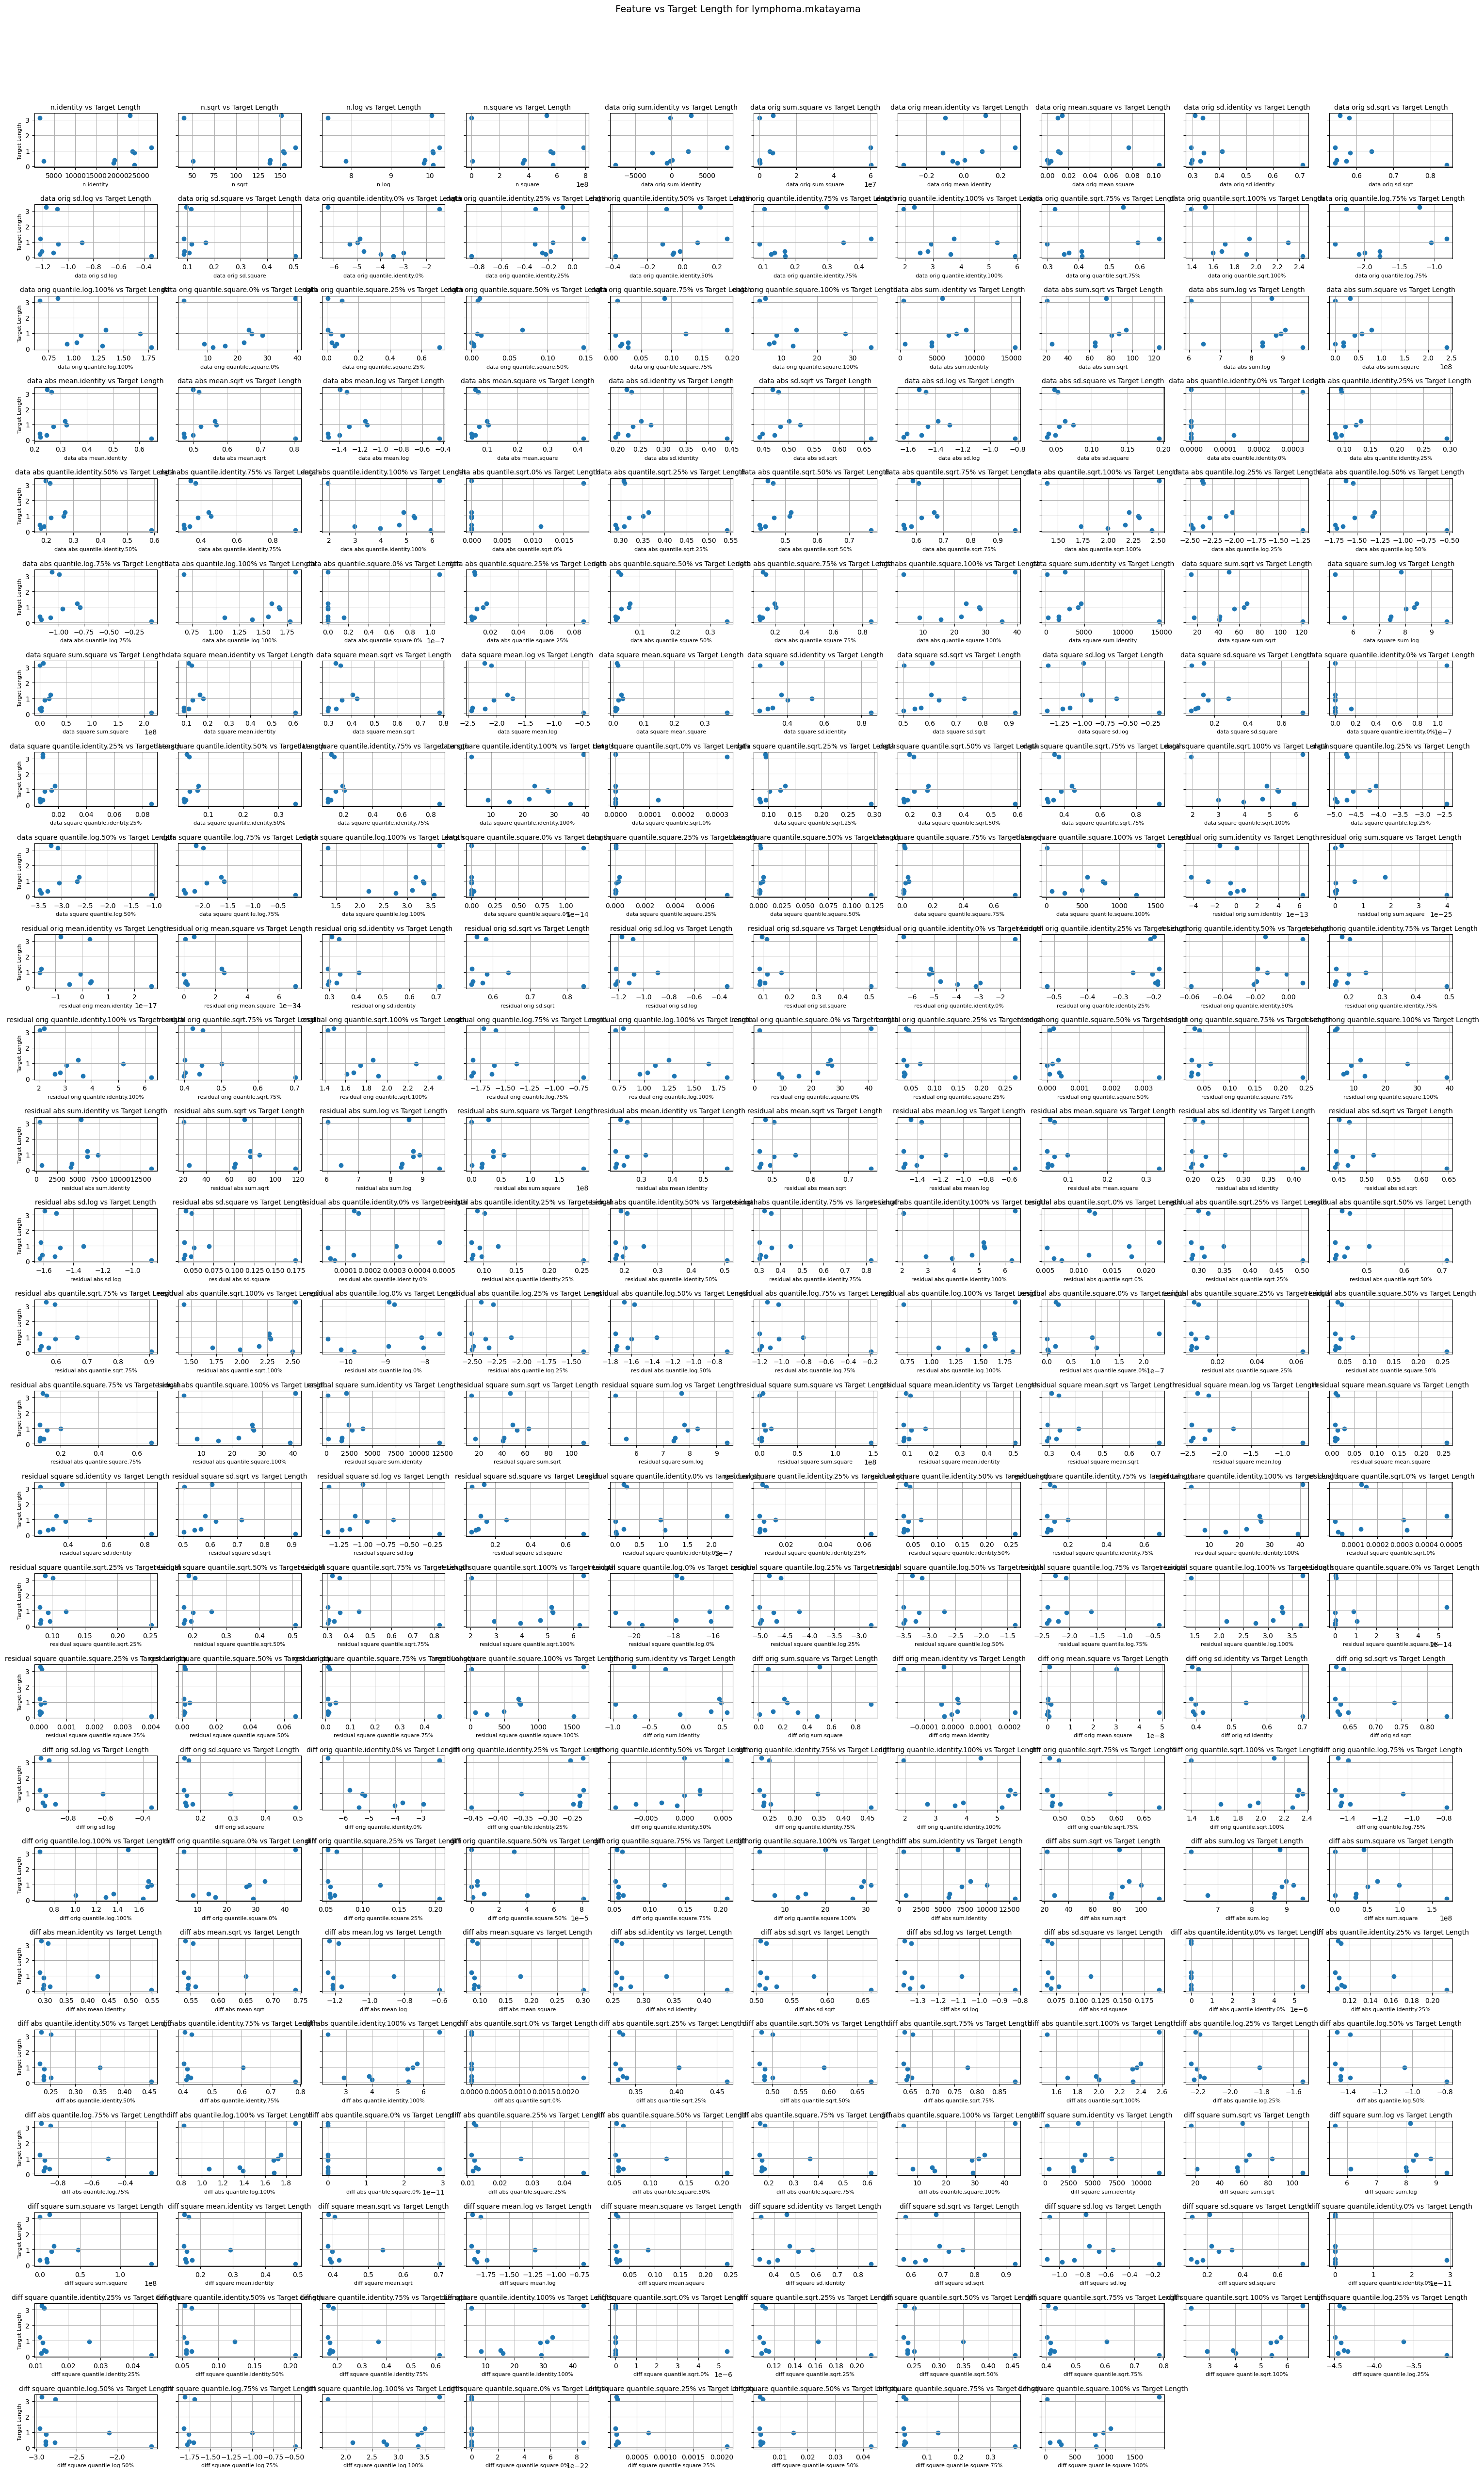

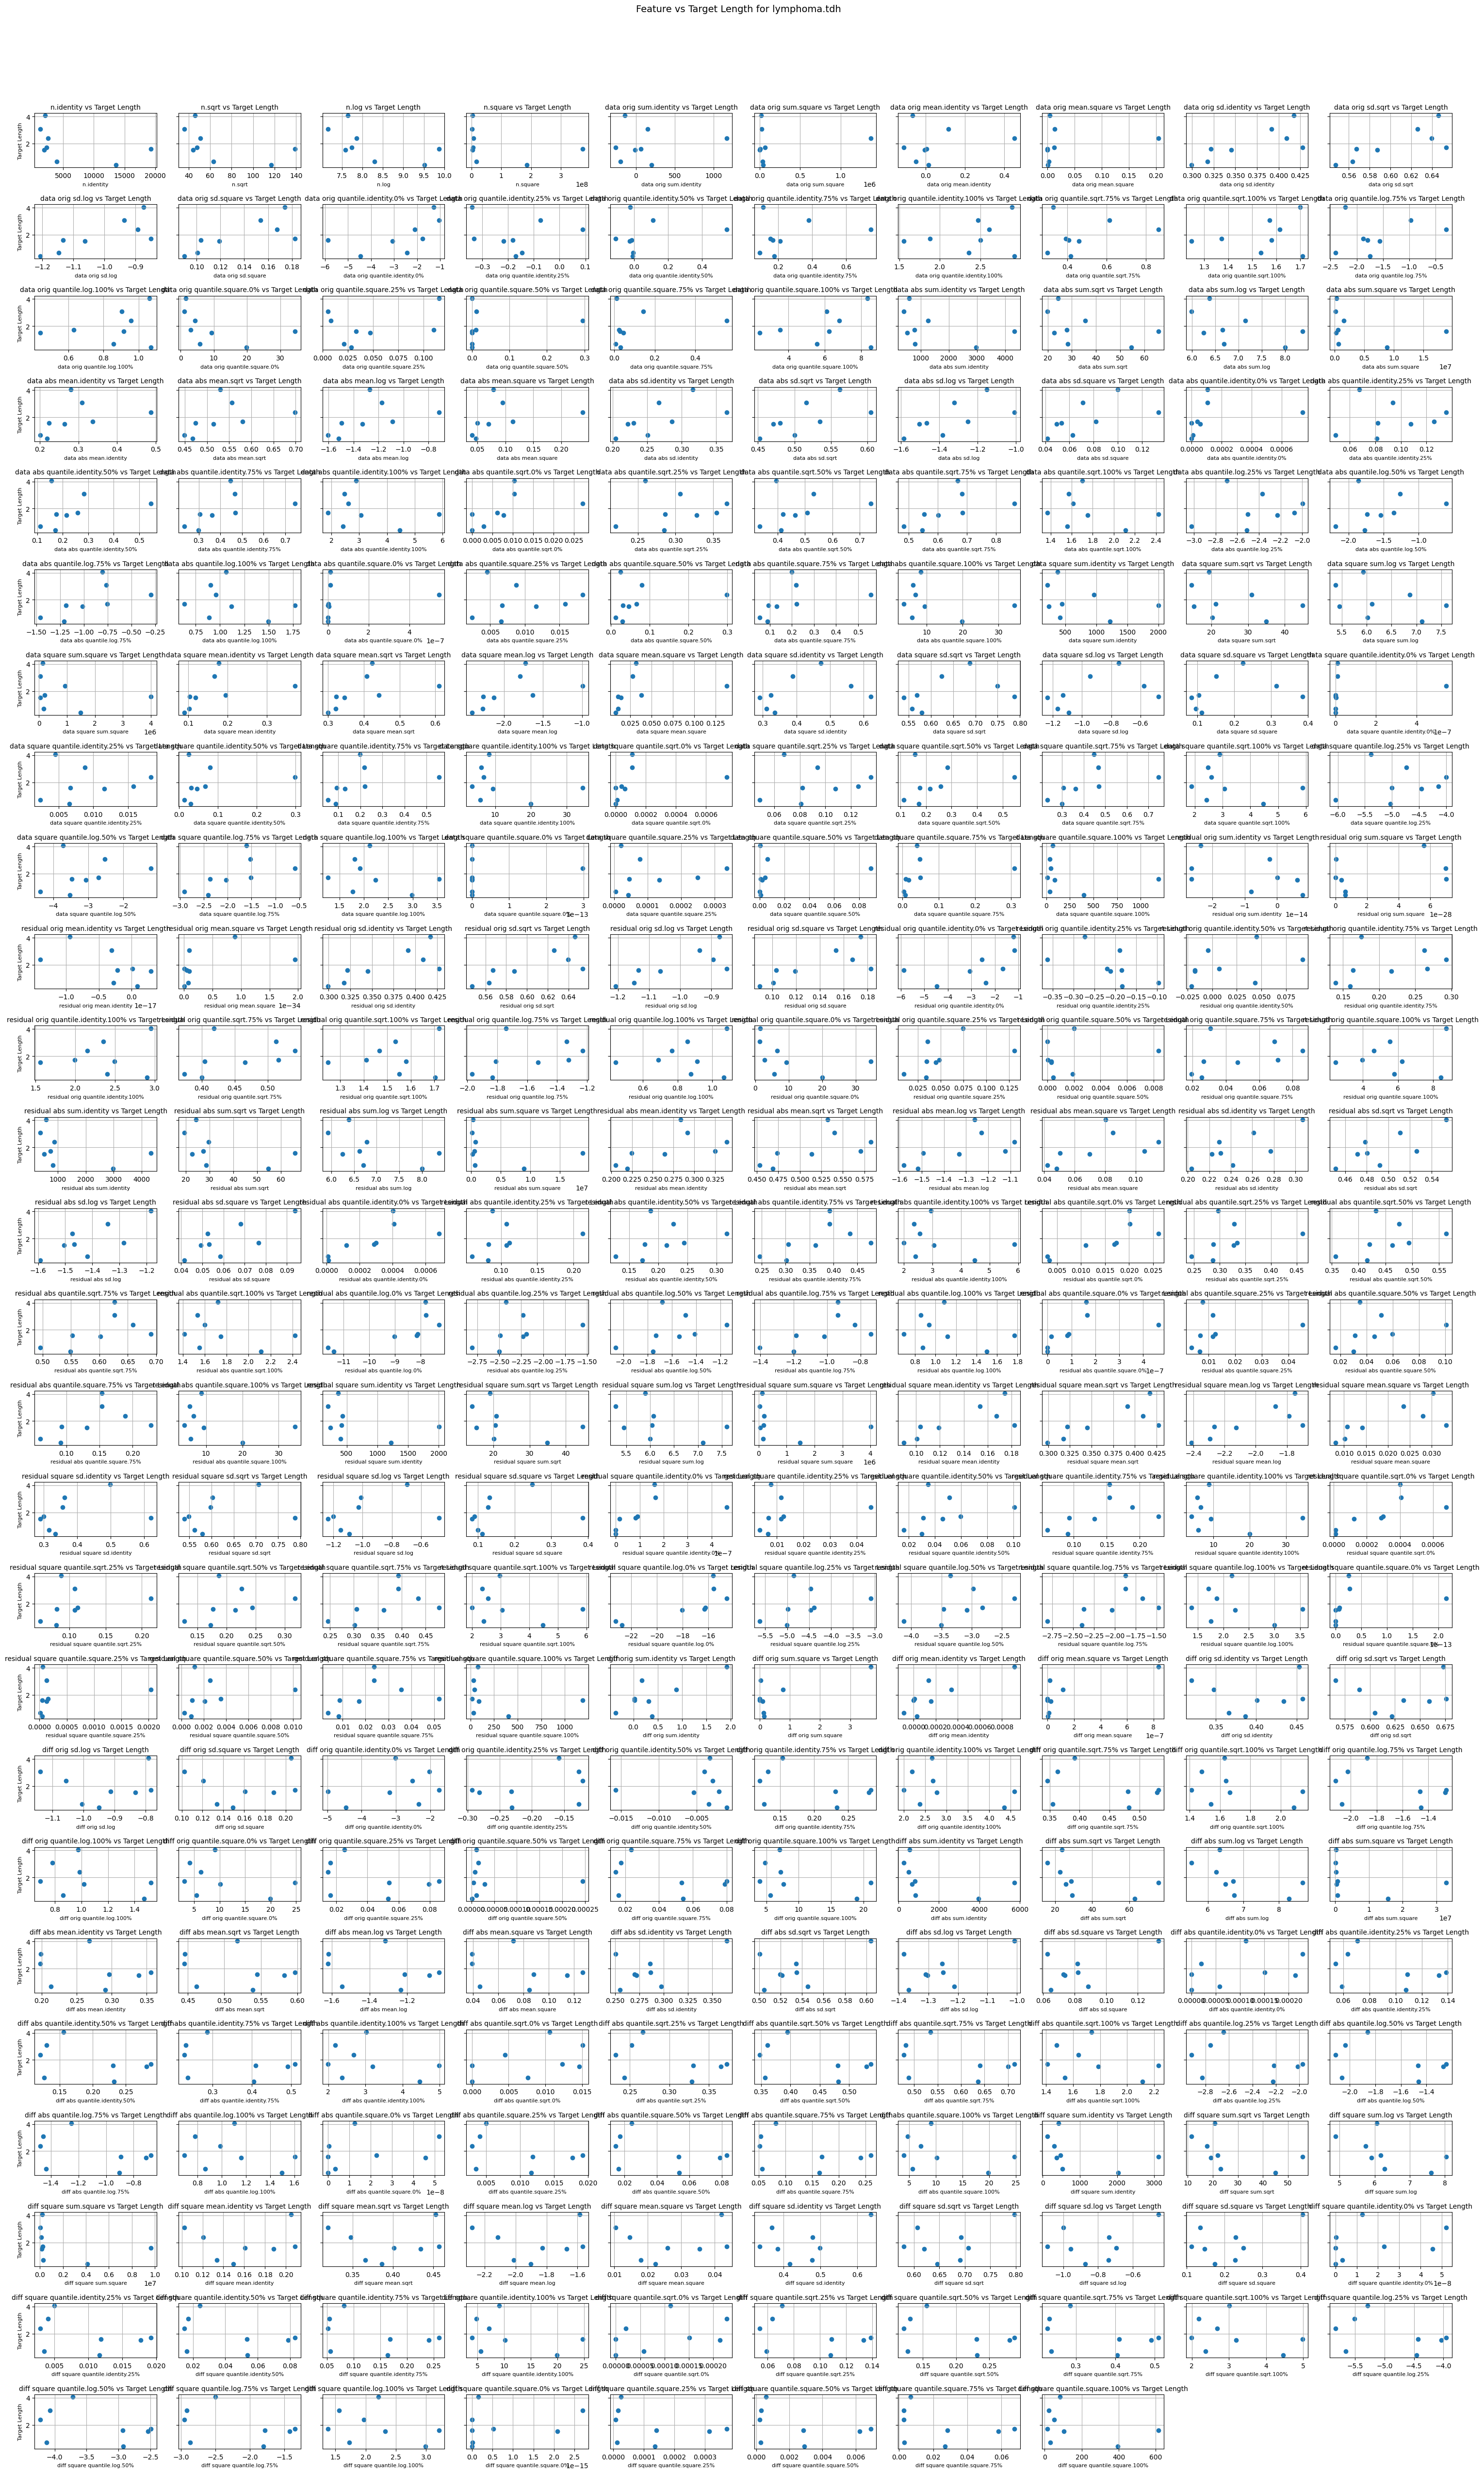

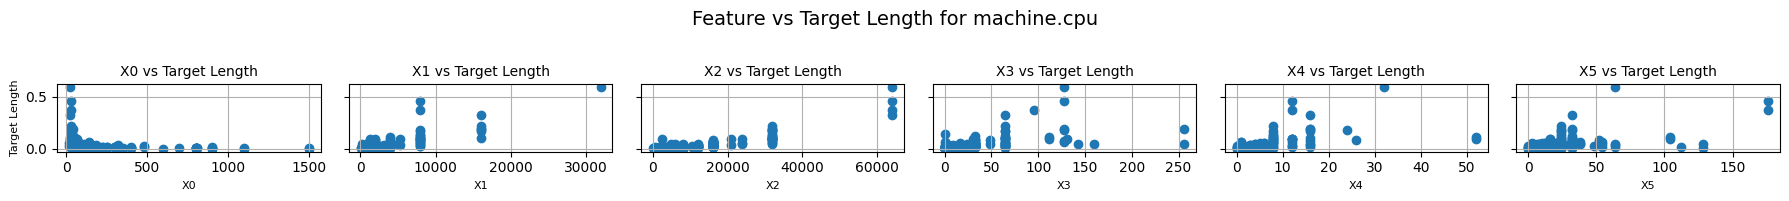

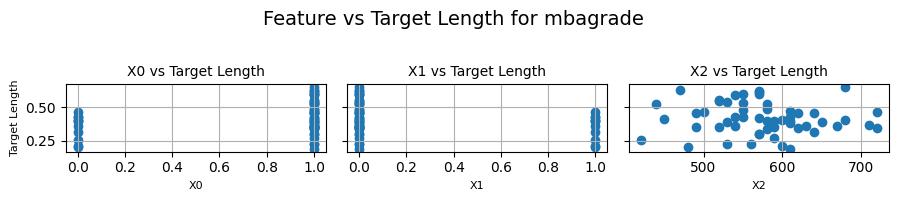

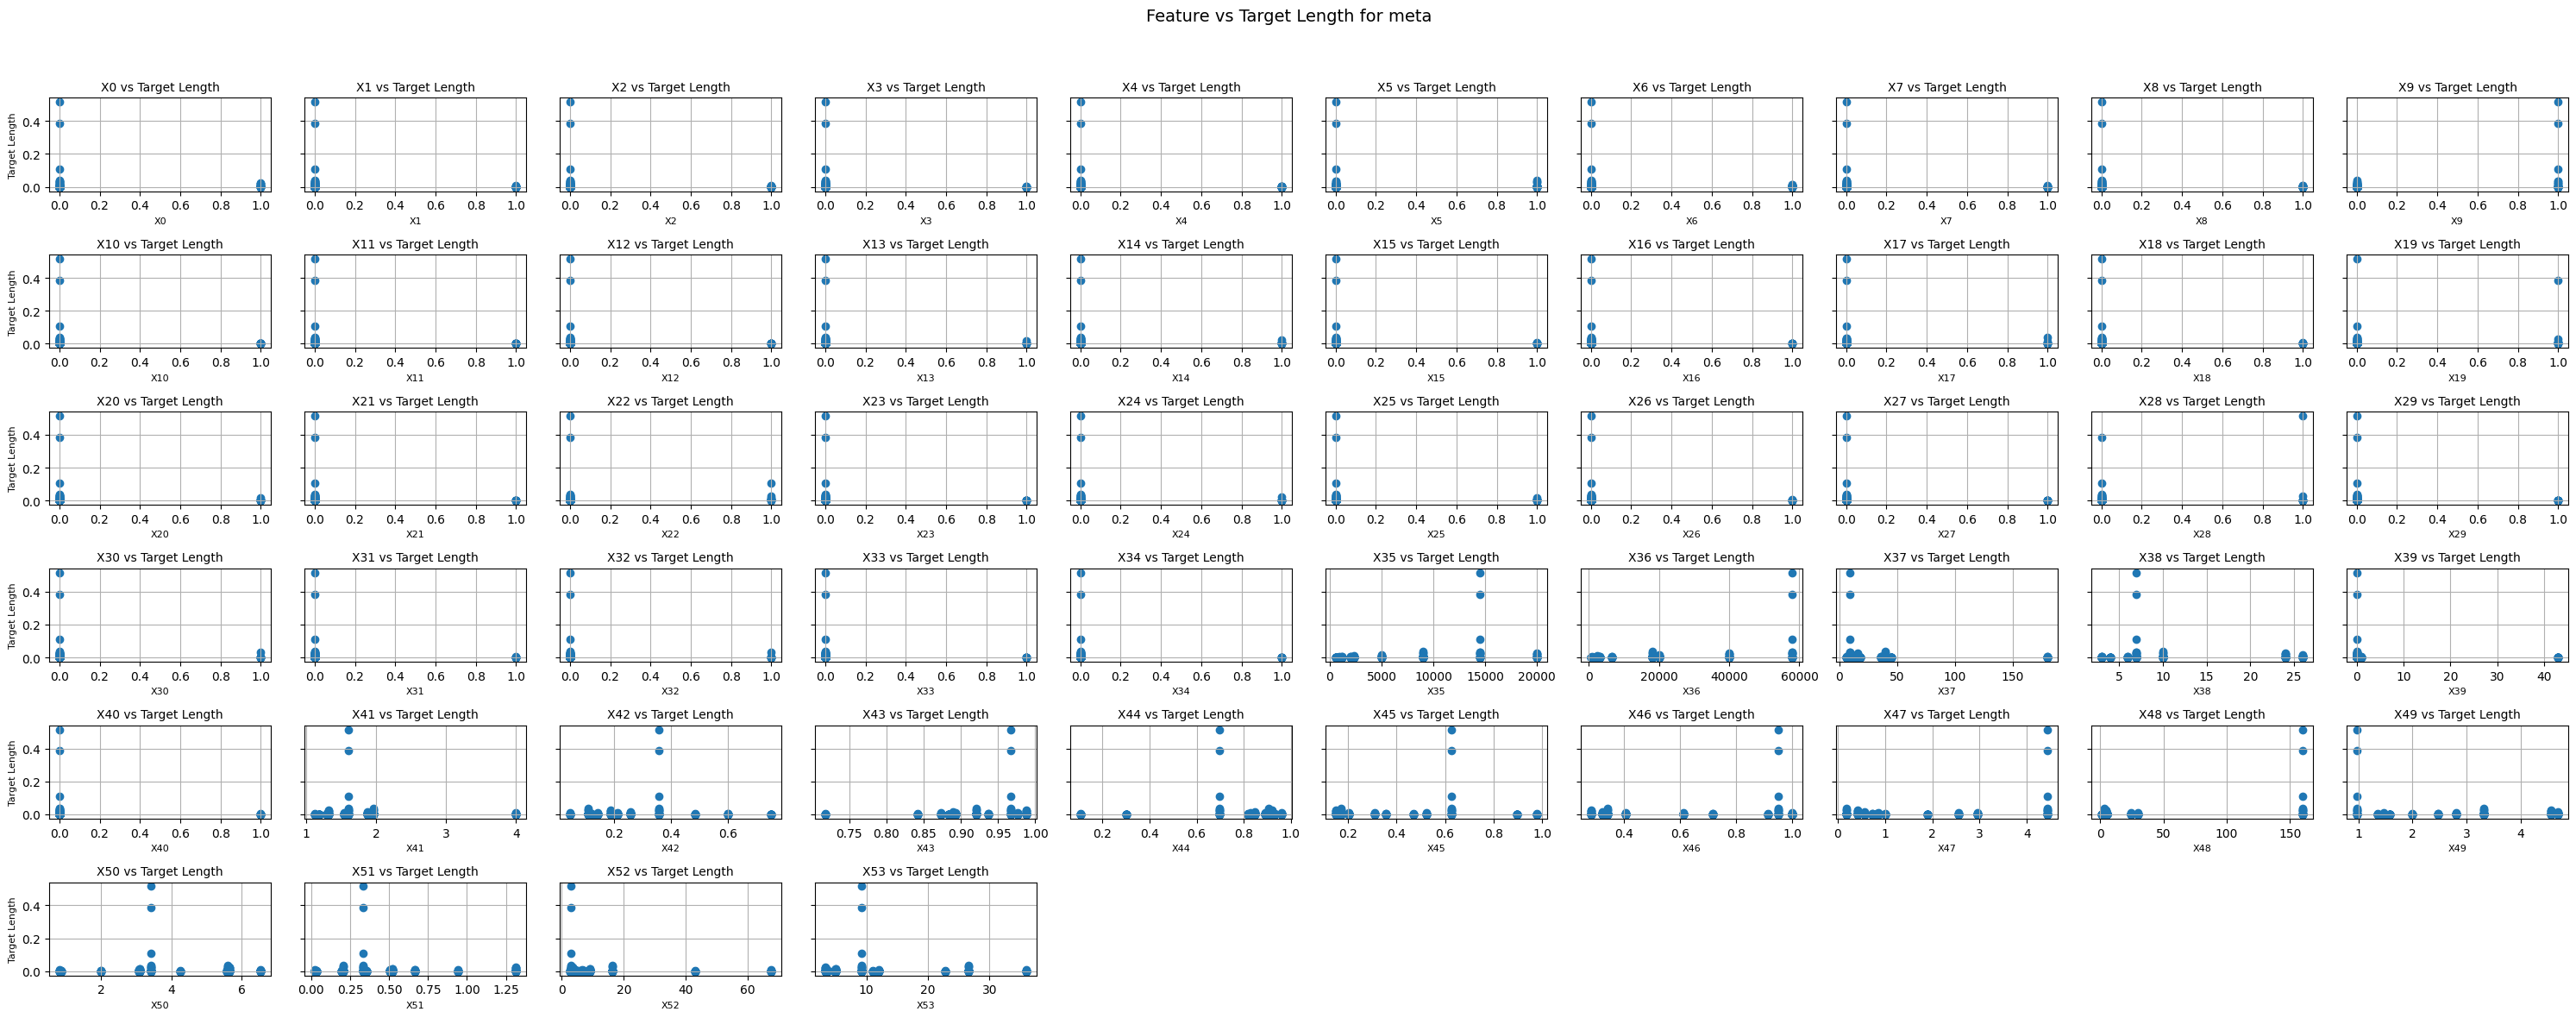

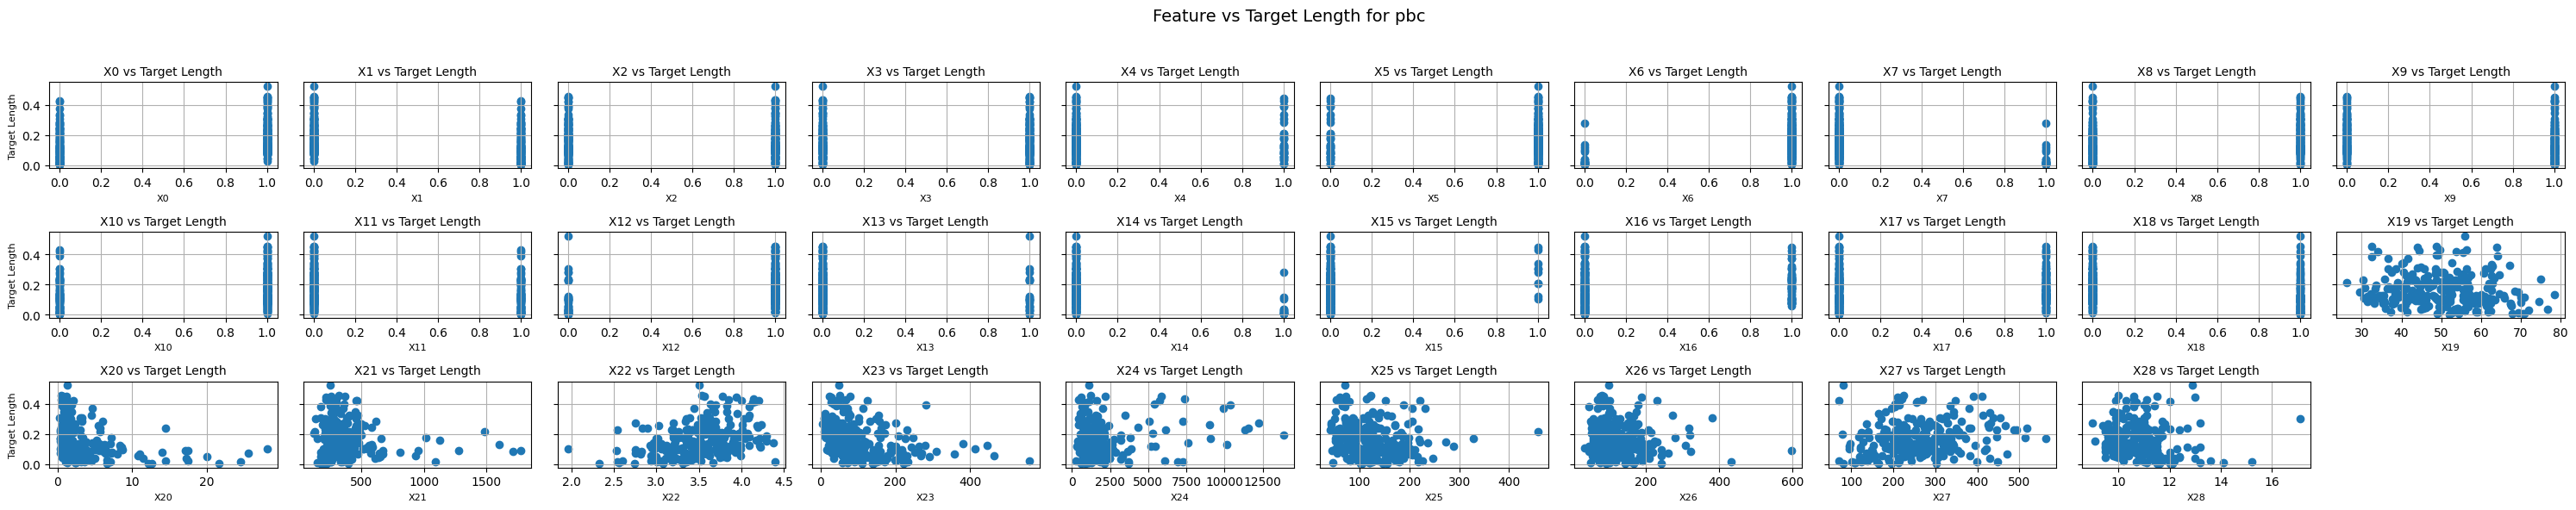

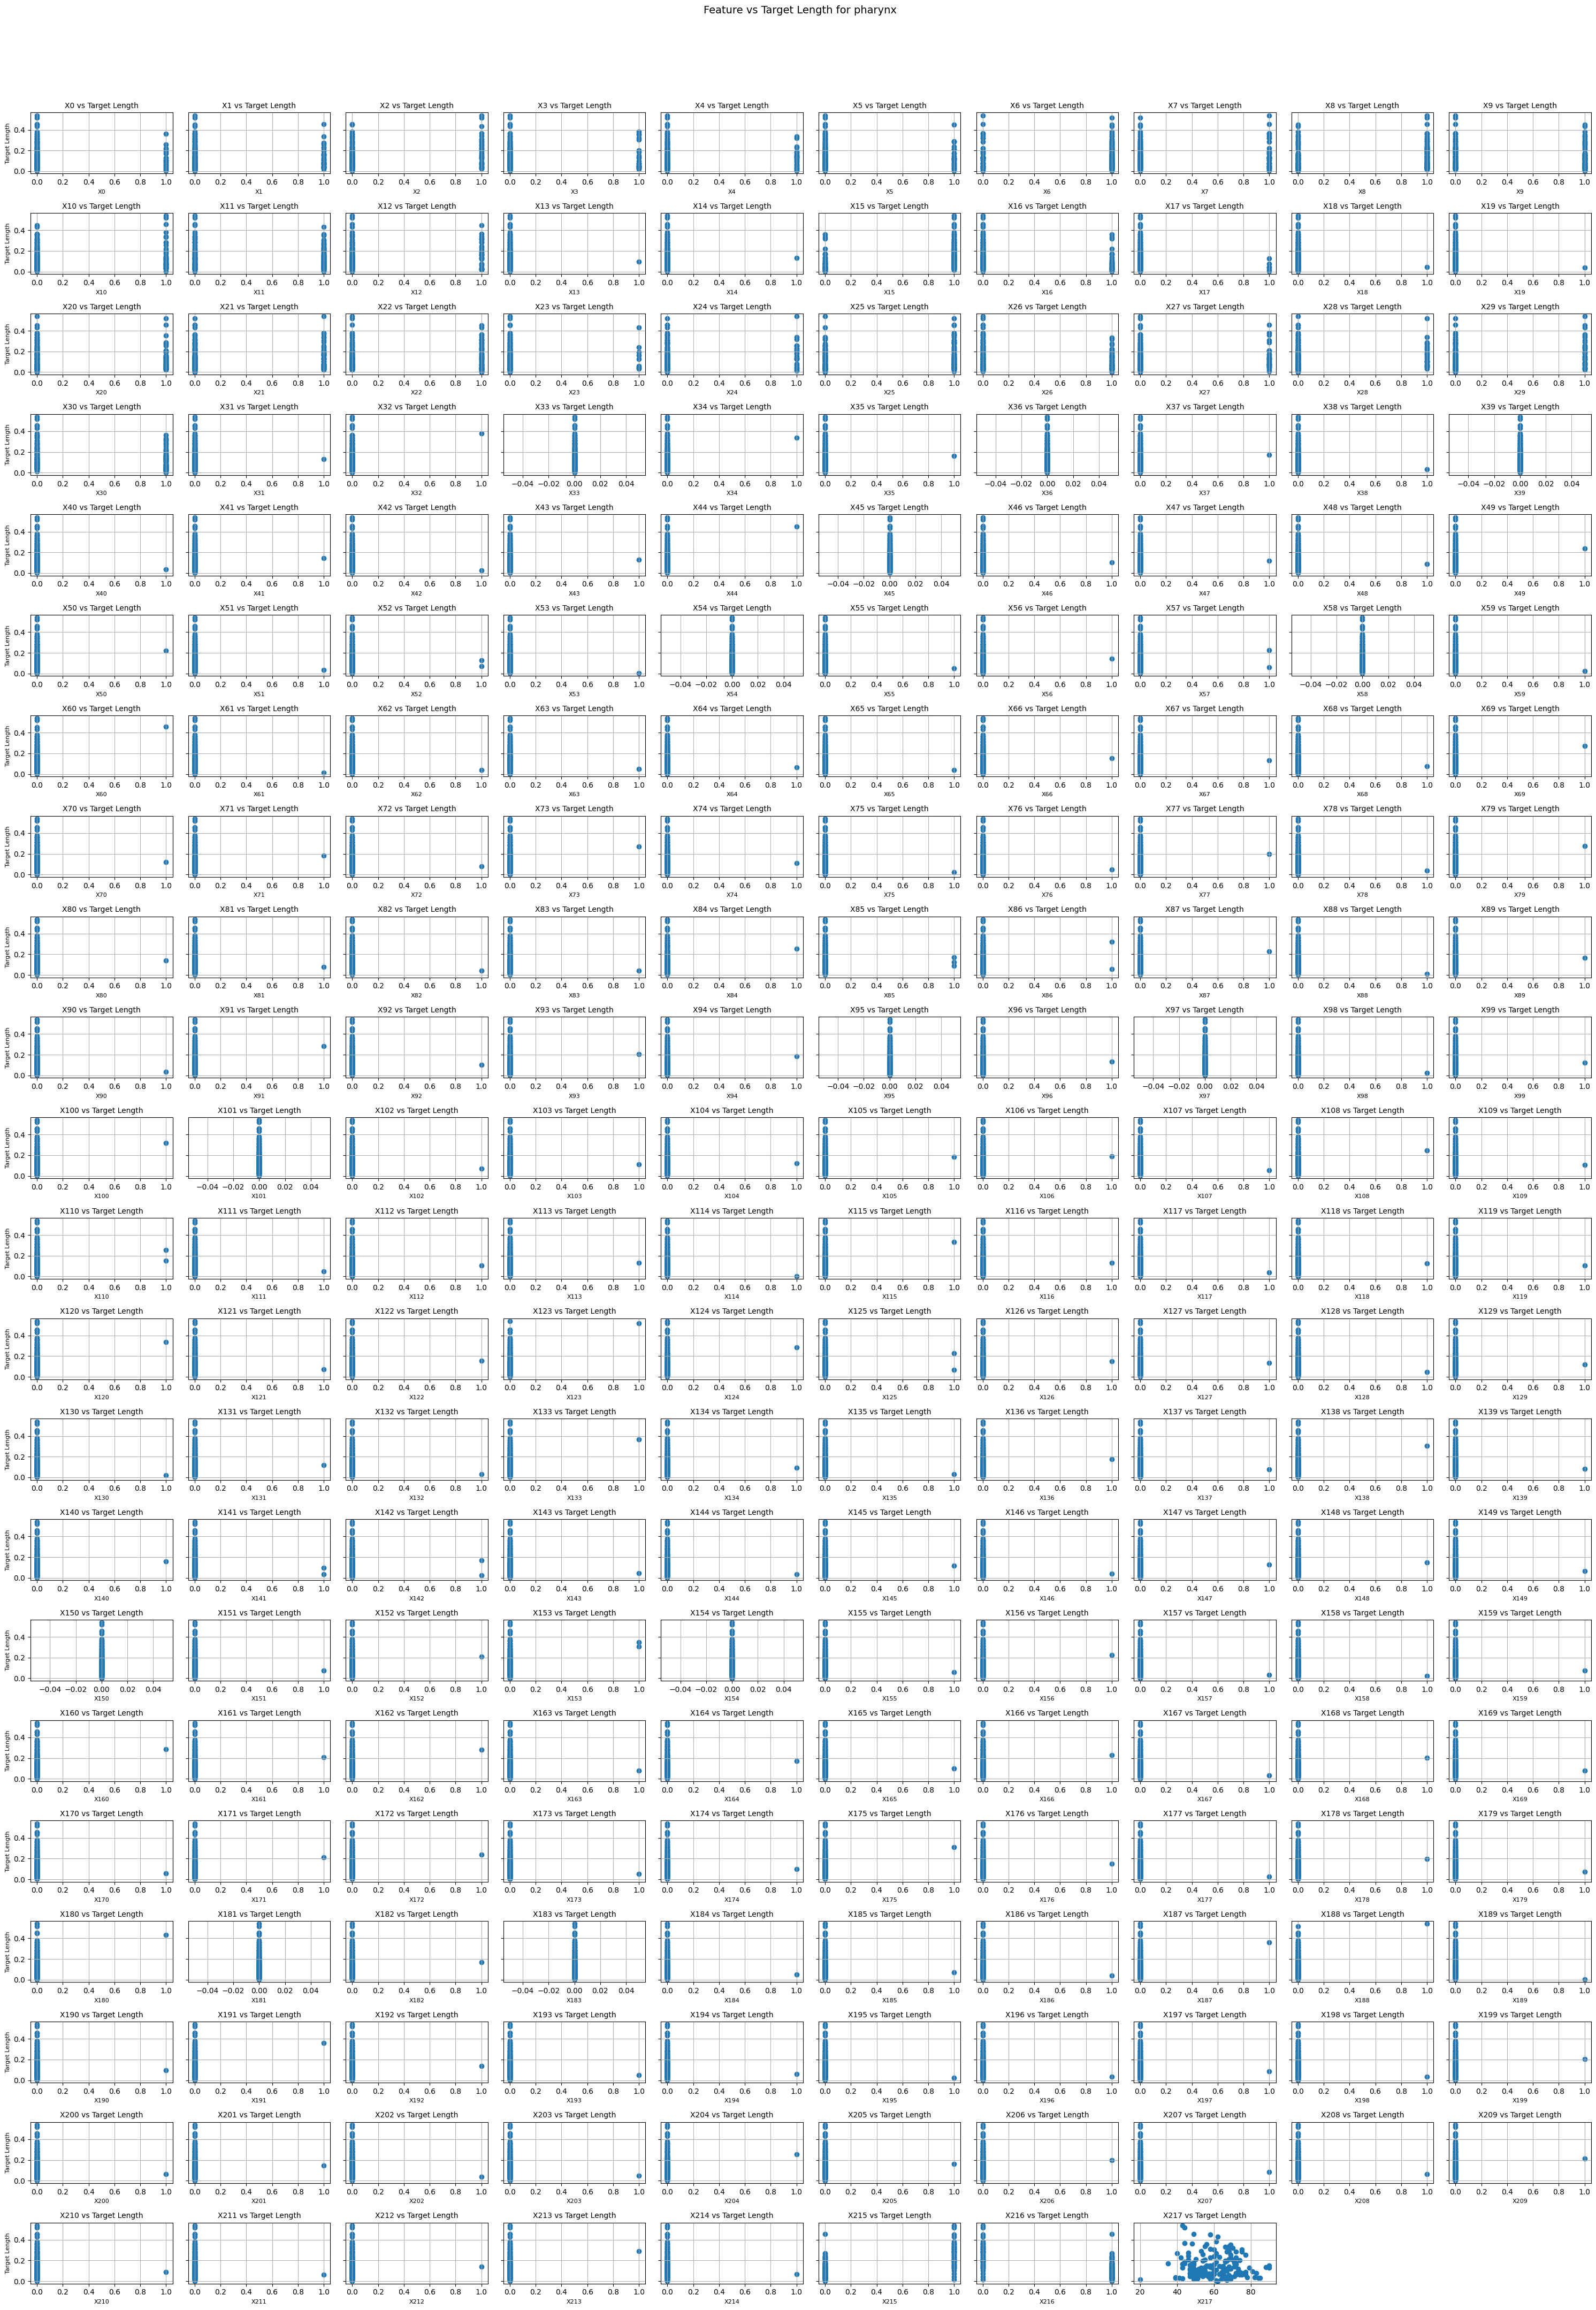

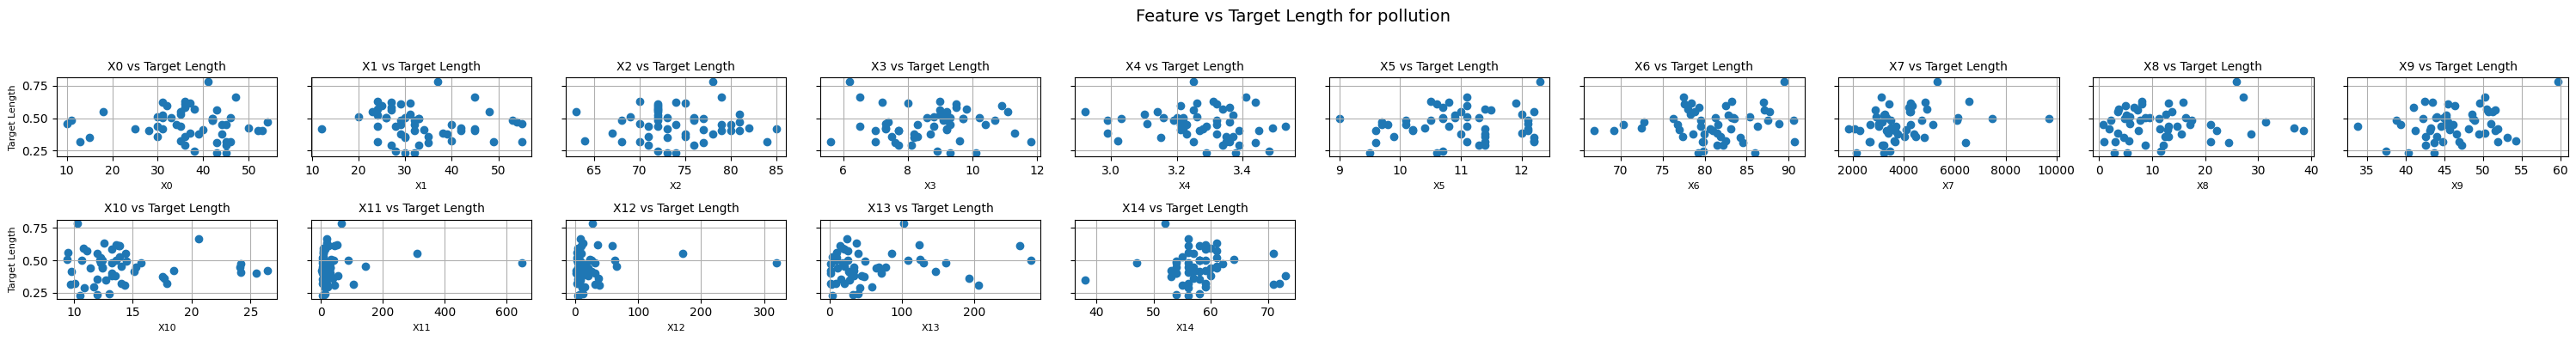

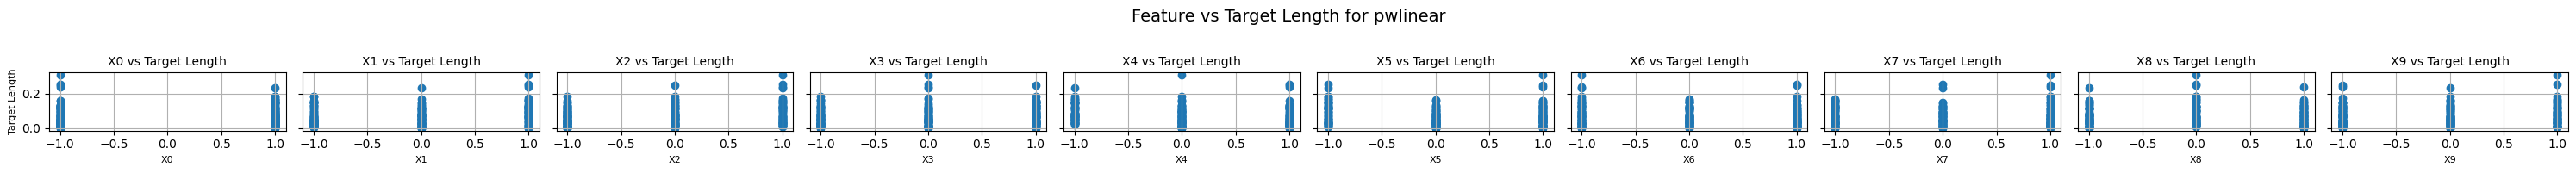

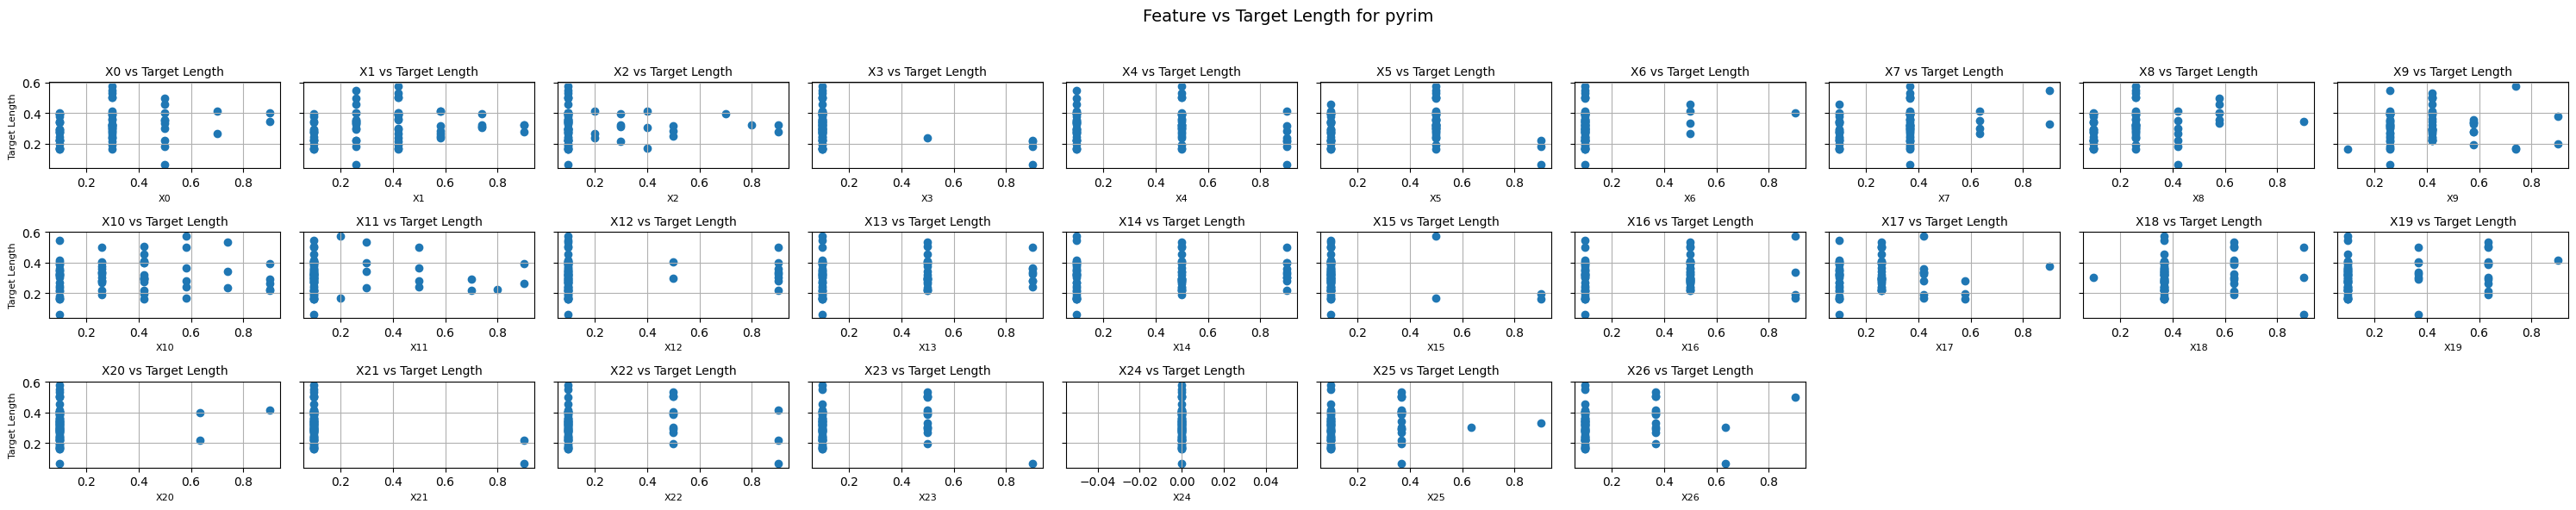

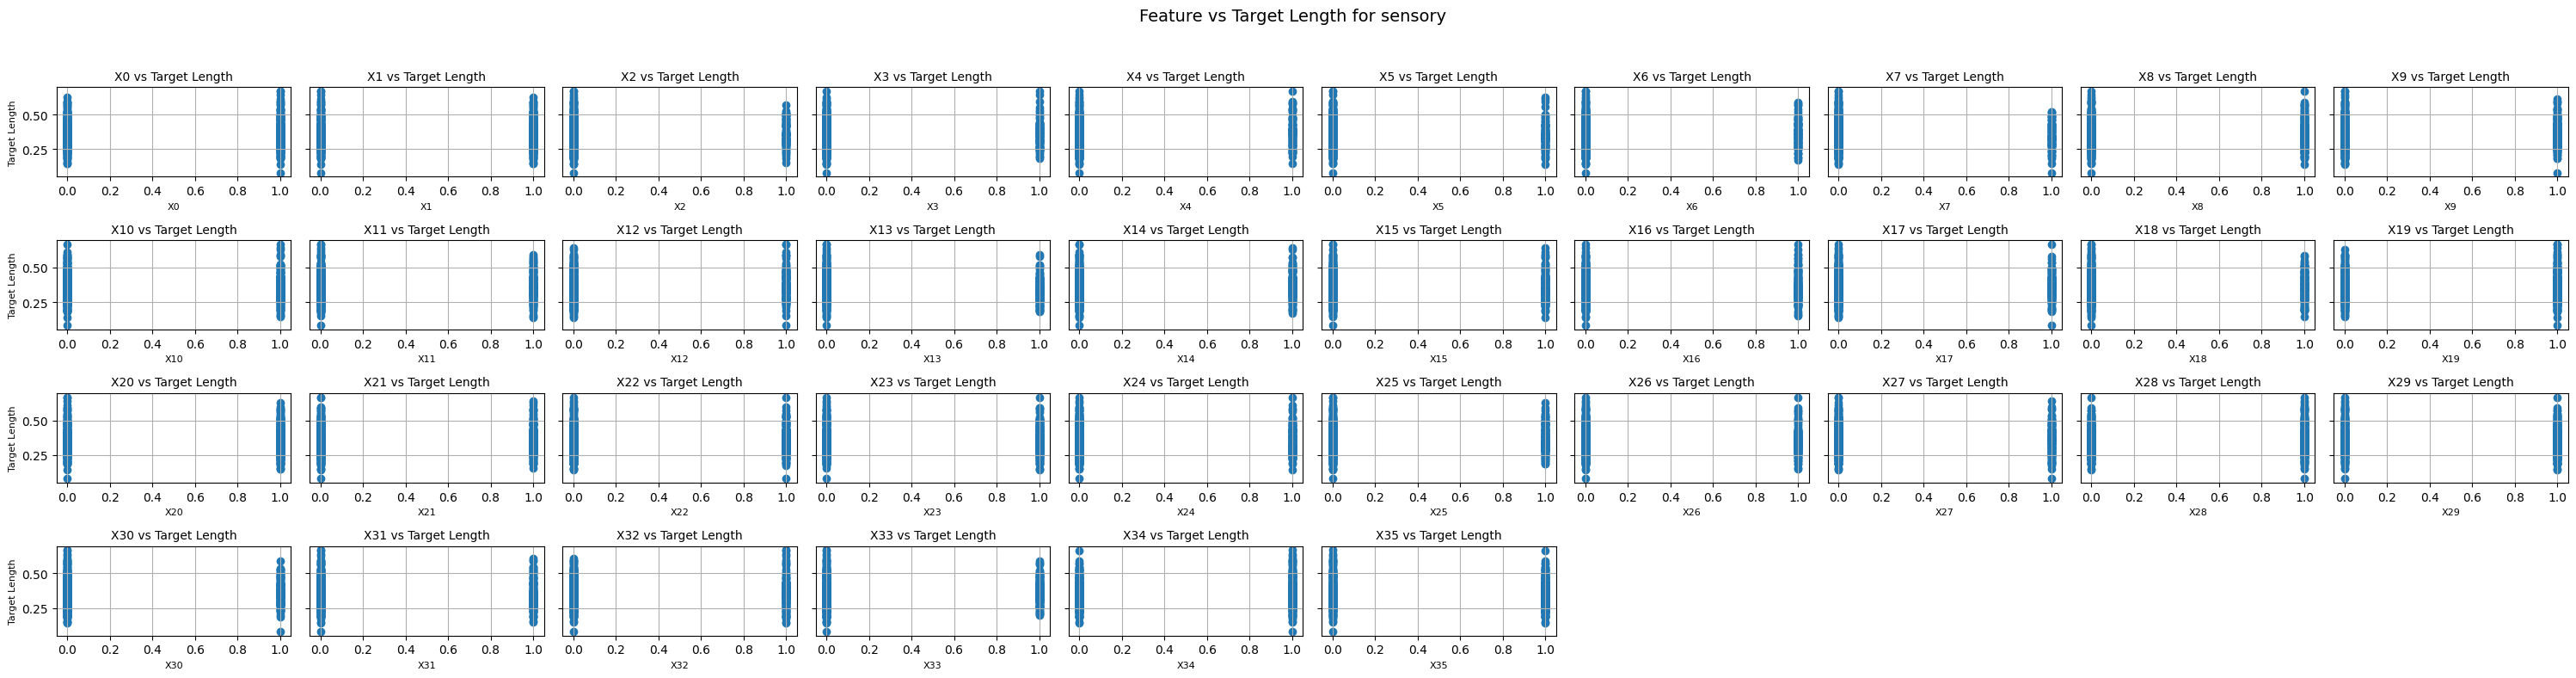

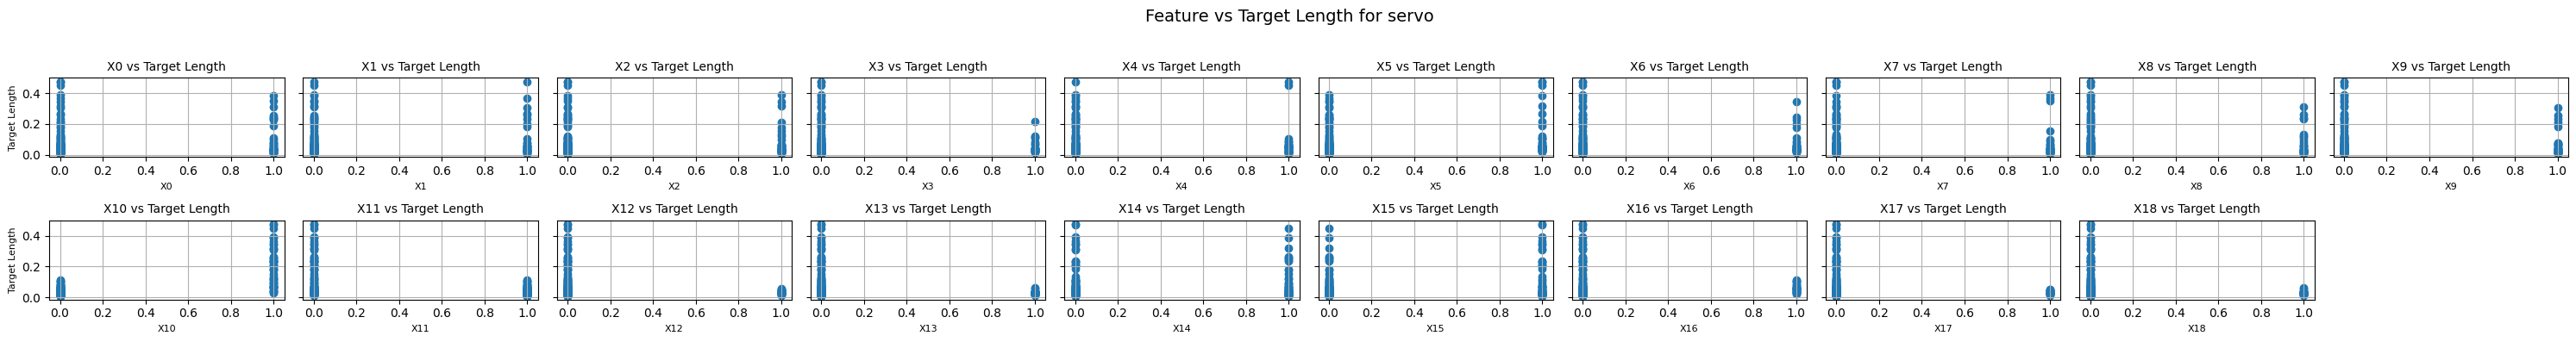

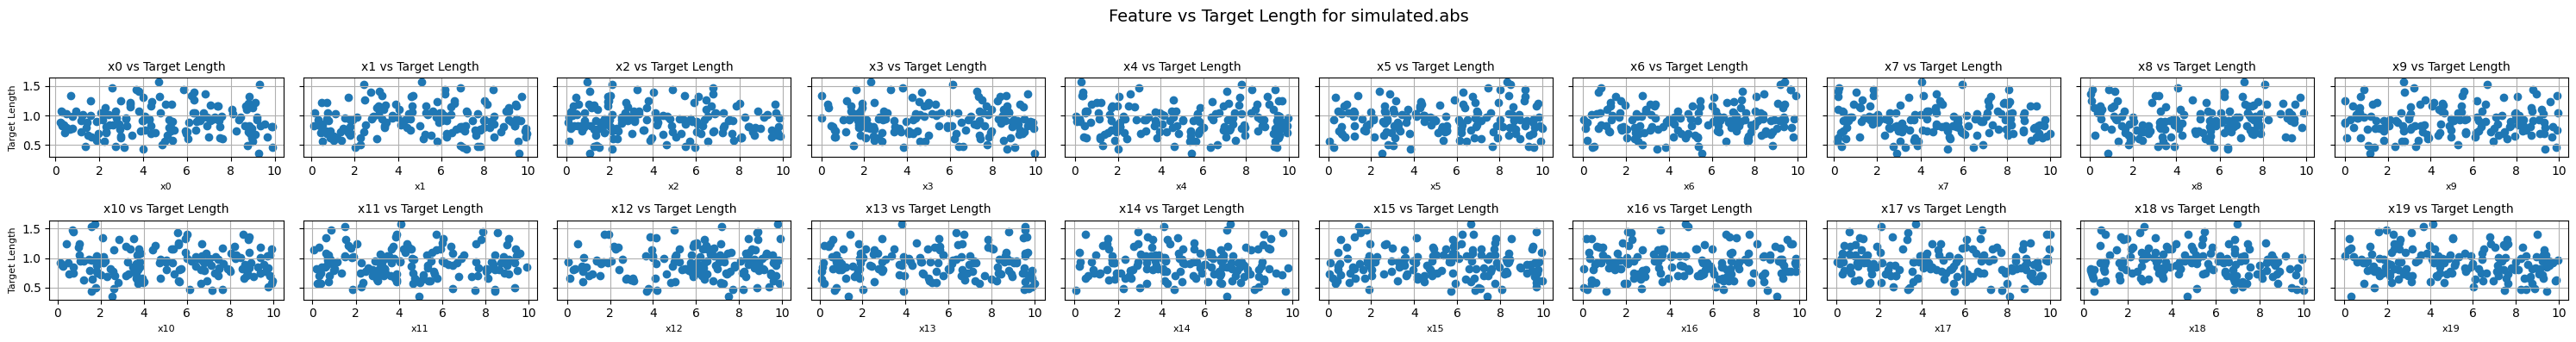

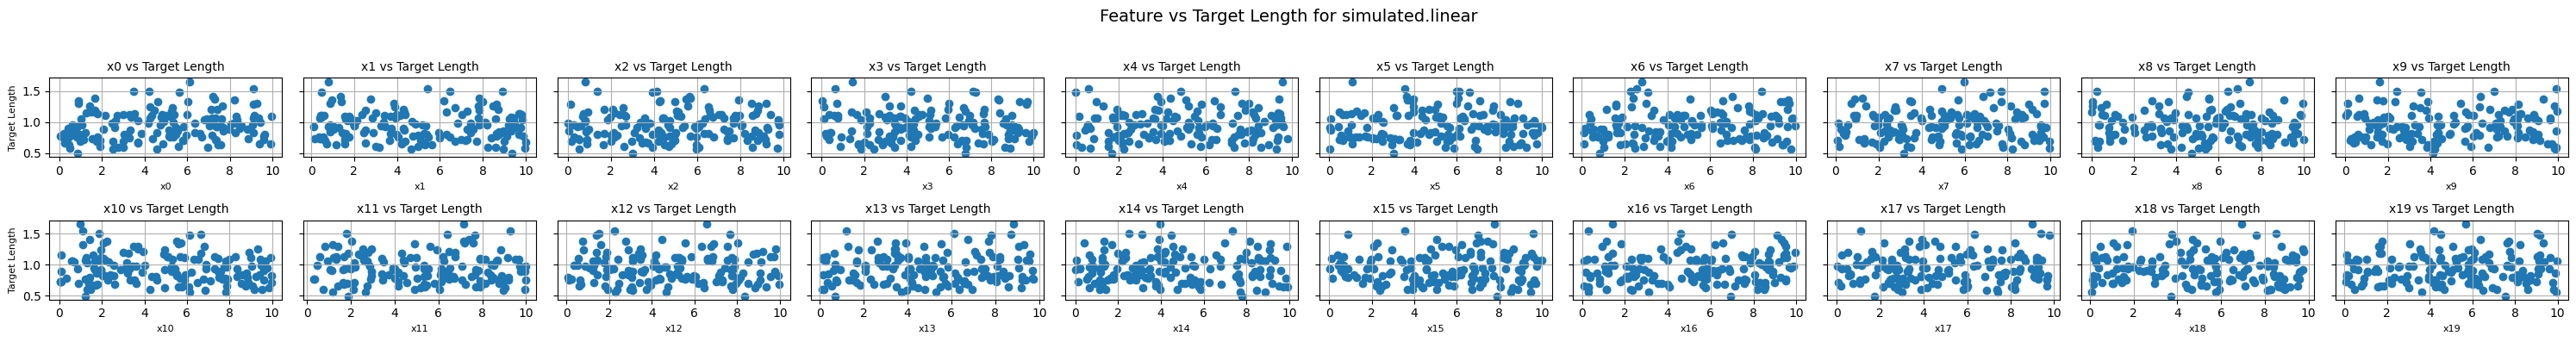

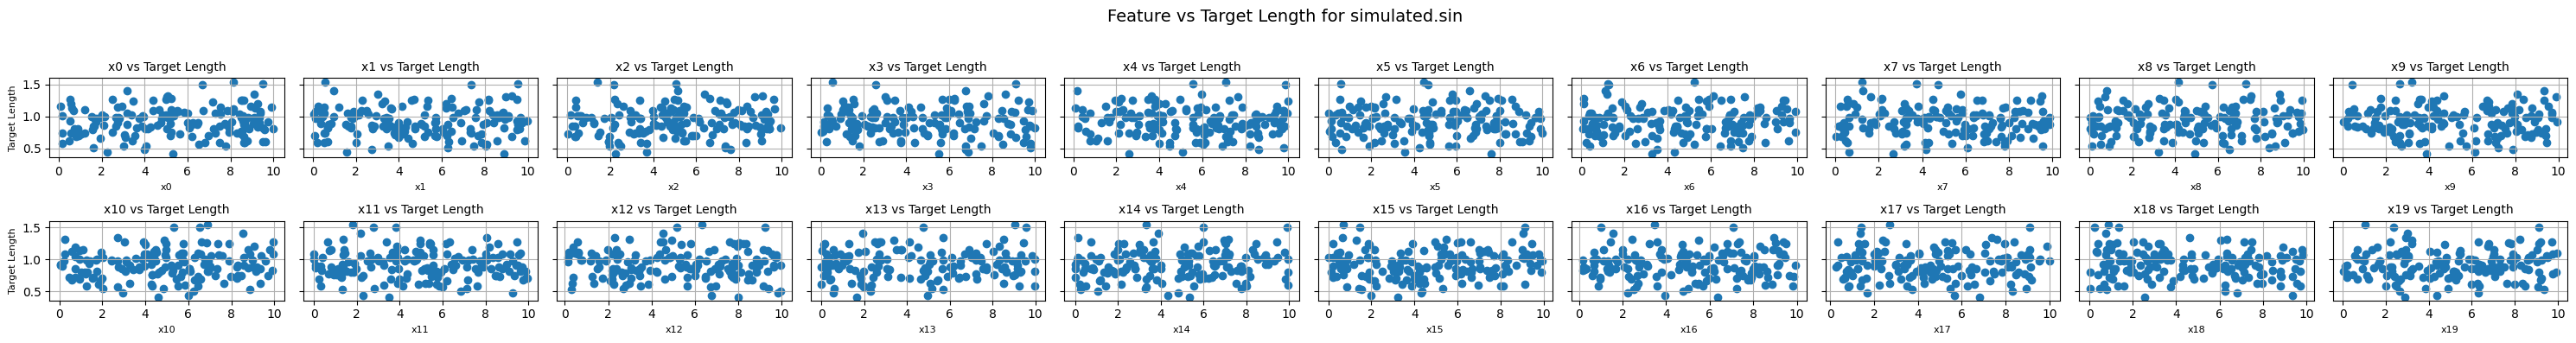

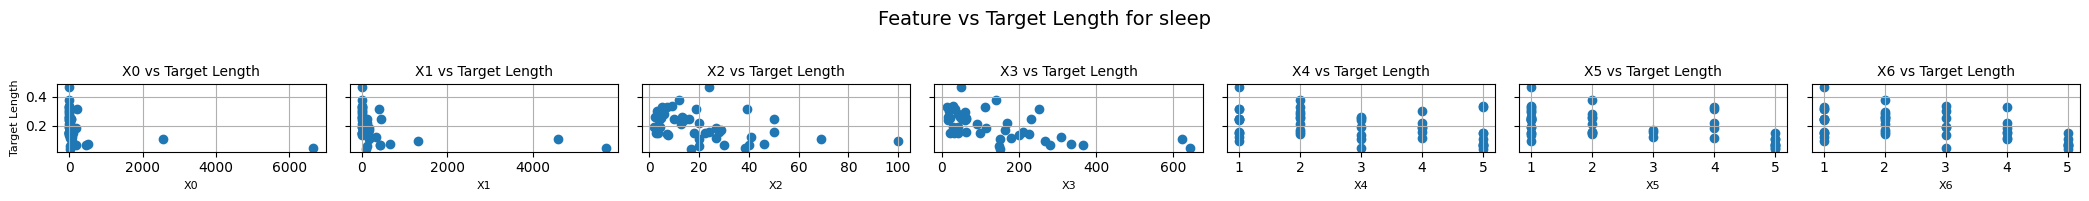

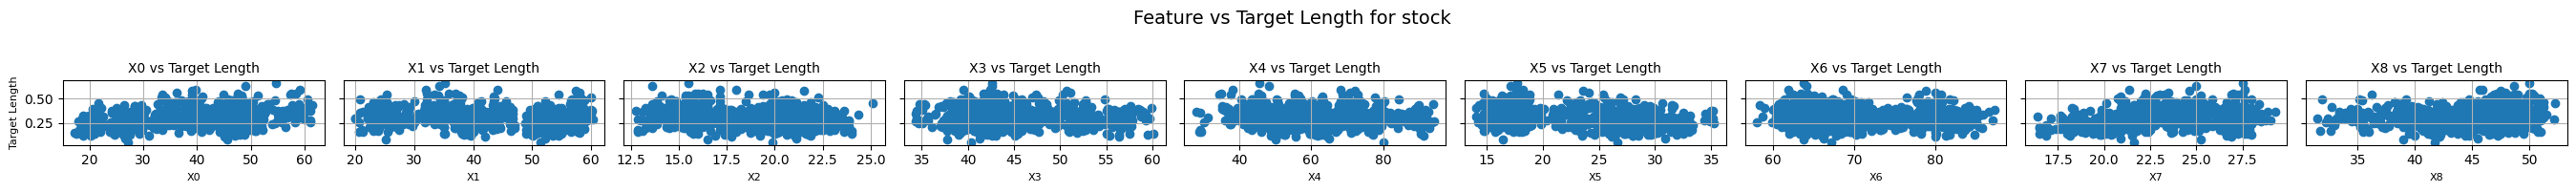

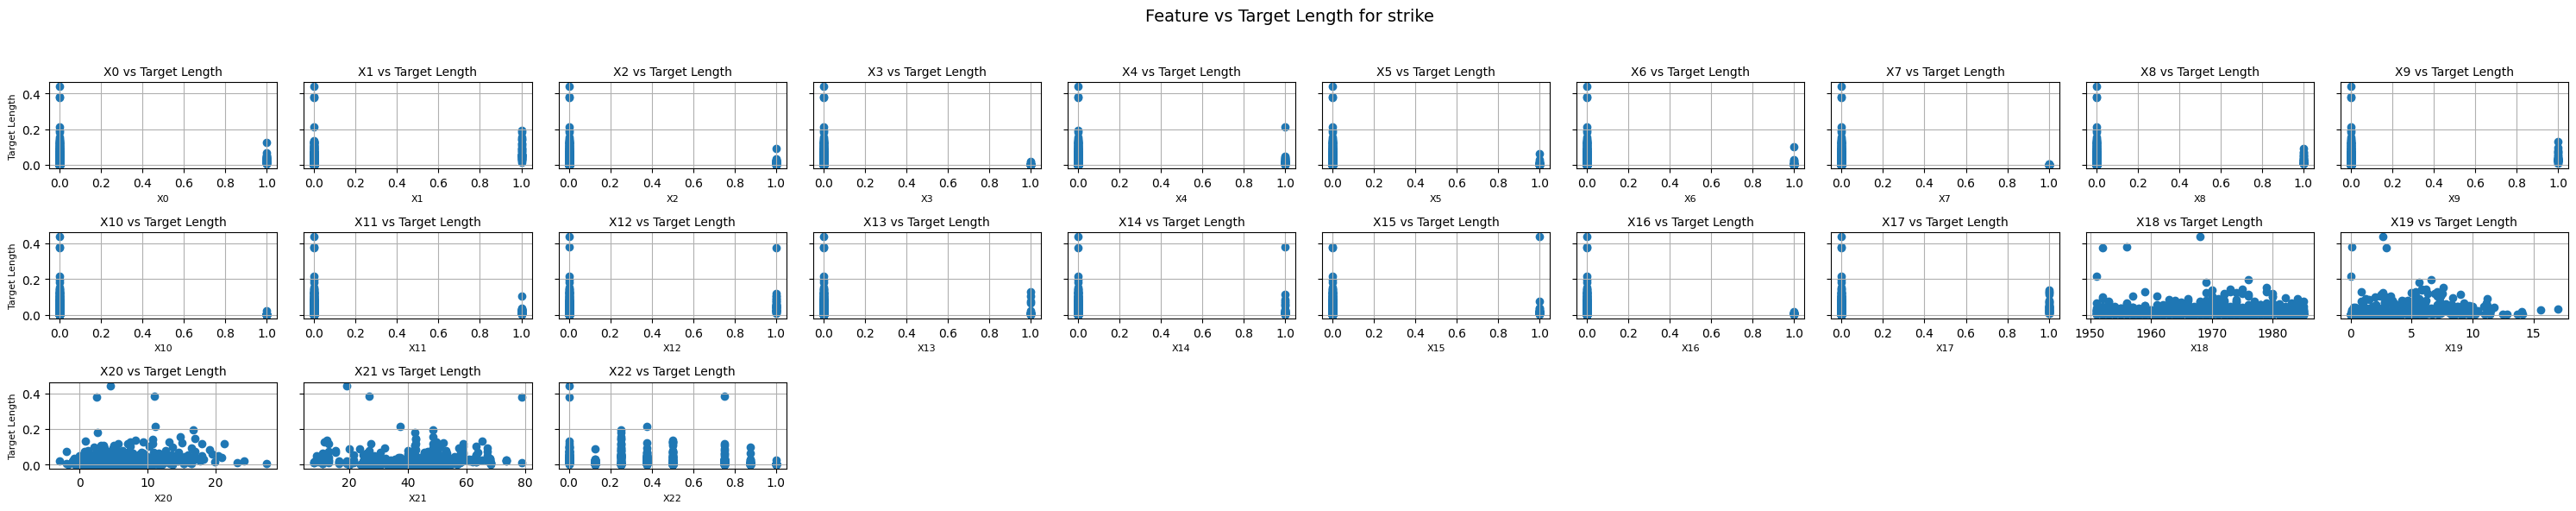

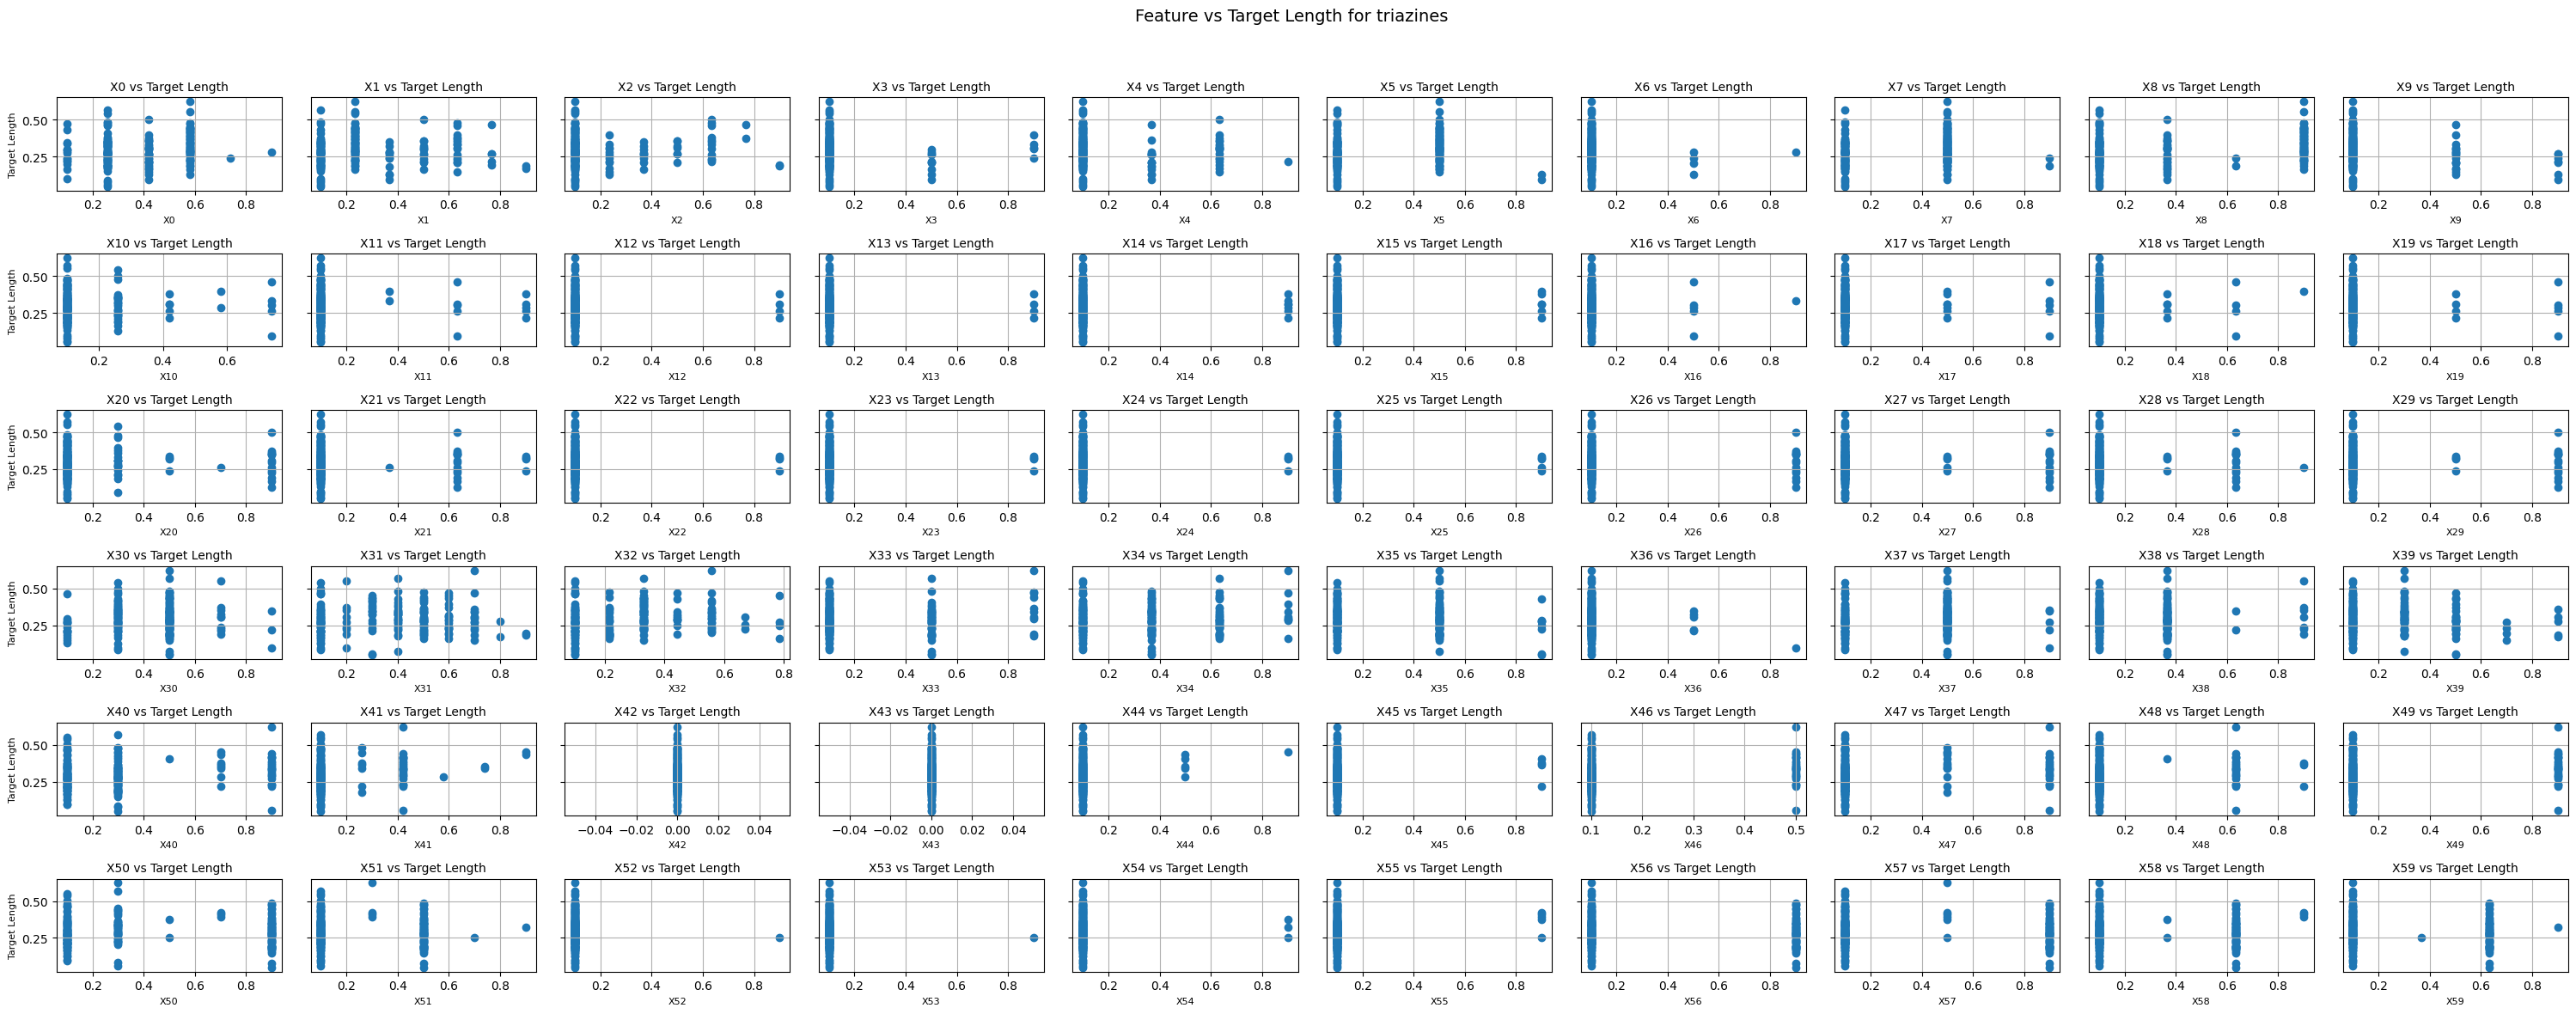

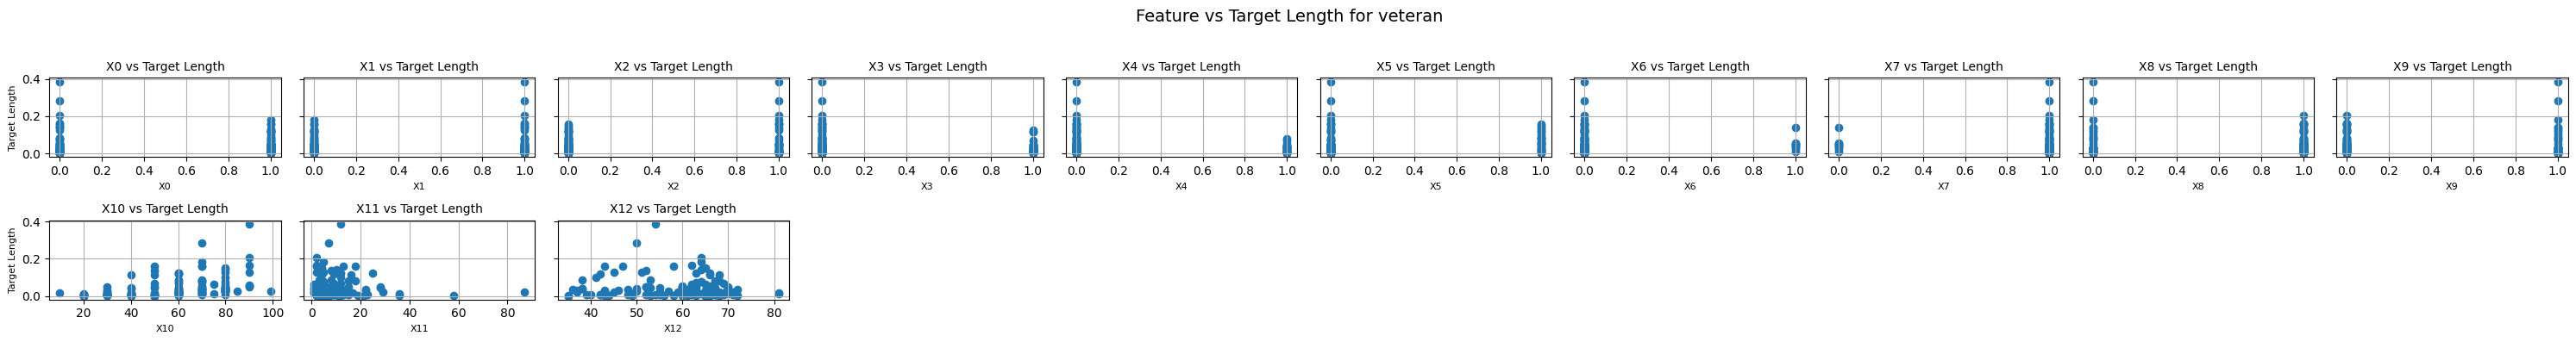

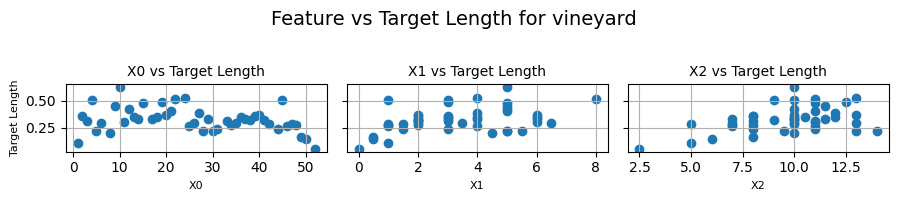

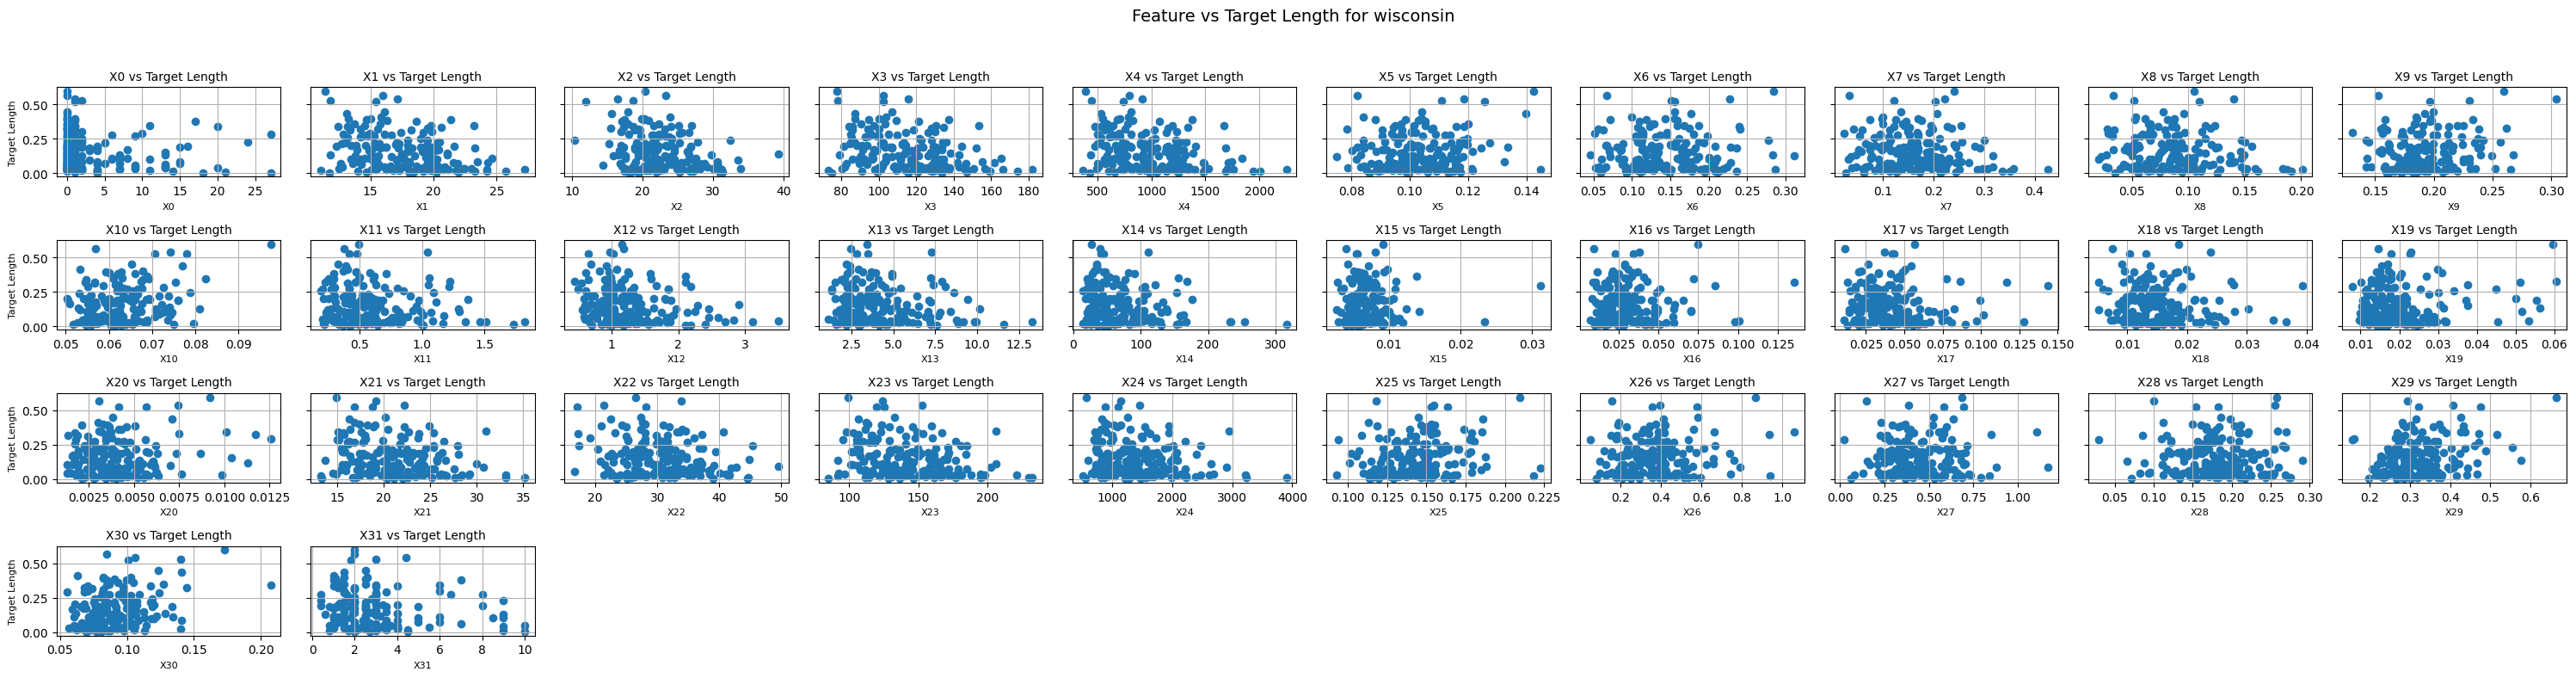

In [4]:
for dataset in datasets:
    plot_feature_target_length(dataset)